**Table of Content**

<ol>
        <li>Intro</li>
            <ol>        
                <li>Data Dictionary</li>
            </ol>
        <li>Load Data</li>
        <li>EDA
            <ol>
                <li>Check datatypes and missing data</li>
                <li>Checking for duplicate data and correlation</li>
                <li>Data Analysis</li>
                    <ol>
                        <li>Univariate Analysis - Categorical</li>
                        <li>Univariate Analysis - Numeric</li>
                        <li>Bivariate - Categorical</li>
                        <li>Bivariate - Numerical</li>
                        <li>Drop the Features</li>
                    </ol>
                <li>EDA Summary</li>
            </ol>
        </li>
        <li>Preprocessing
            <ol>
                <li>Check datatypes and missing data</li>
                <li>Merge the malicious classes together and write the preprocessed data into a csv file</li>
                <li>Converting categorical features to numeric</li>
                <li>Split the dataset into train and test</li>
                <li>Feature Scaling</li>
                <li>PCA</li>
            </ol>
        </li>
        <li>Modelling with LogReg (modelling with SMOTE balanced dataset is in seperate notebook)
            <ol>
                <li>Baseline Modelling</li>
                <li>Analysis of False Negative Values</li>
                <li>Hyperparameter Tuning For LogReg</li>
            </ol>
        </li>
        <li>Modelling with XGBoost (modelling with SMOTE balanced dataset is in seperate notebook)
            <ol>
                <li>Experimenting With Number of Estimators</li>
                <li>Experimenting With Max Depth</li>
                <li>Experimenting With Learning Rate</li>
                <li>Experimenting With Objective Funtion</li>
                <li>Testing With The Best Hyperparamers</li>
            </ol>
        </li>
        <li>Modelling With Dense Neural Network</li> 
            In seperate notebook
        <li>Comparison of Logistic Regression, XGBoost and DenseNetwork Performance</li>
    </ol>

## 1. Intro

The dataset has come from the open source network analyzing software `"Wireshark"`. The dataset contains information about `network packets` that had been exchanged between client and server technologies, where network devices (routers and swithces) were used as a medium. `"Network packet"` or `"packet"` is a unit of data that is transmitted over a network. It's the basic unit of communication in network protocols such as the Internet Protocol. A packet typically consists of two main parts: `the header` and `the payload`. `The header` contains control information such as the source and destination addresses, protocol information, packet sequence number, and error detection codes. `The payload` contains the actual data being transmitted. The dataset does not provide information about header and payload and due to privacy.

The dataset also contains information about whether the network packets class is `normal` or `malicious`, i.e. have been used to perform network attacks.

### A. Data Dictionary

To help us with our analysis, let's take a look at the data dictionary down below.

#### Packet source and destination information
- SRC_ADD (numeric). Source (client) IP address. Due to sensitivty, IP address has been anonymized.
- DES_ADD (numeric). Destination (server) IP address. Due to sensitivty, IP address has been anonymized.
- FROM_NODE (numeric). Identifier (IP) for the source node in the network. This is the source node for the packets under the consideration. The source nodes are clients, servers, switches and routers indicating where the packets have originated from.
- TO_NODE (numeric). Identifier (IP) for the destination node in the network. This is the destination node for the packets under the consideration. The destination nodes are clients, servers, switches and routers indicating which device will receive the packets.
- NODE_NAME_FROM (object). Same as FROM_NODE but identifier is a hostname.
- NODE_NAME_TO (object). Same as TO_NODE but identifier is a hostname.

#### Packet size information

- PKT_SIZE (numeric). Size of the network packet in bytes.
- NUMBER_OF_BYTE (numeric). The total number of bytes transmitted within a flow or connection.
- PKT_AVG_SIZE (numeric). The average amount of data (in bytes) per each packet exchanged between network nodes. 

#### All other information about packet and network.
- PKT_ID (numeric). Unique identifier of a network packet.
- PKT_TYPE (object). Common packet types: 

a. TCP (Transmission Control Protocol). TCP is a connection-oriented protocol used for reliable and ordered data transmission. 

b. UDP (User Datagram Protocol). UDP is a connectionless protocol used for fast and lightweight data transmission.

c. ICMP (Internet Control Message Protocol). ICMP is a network-layer protocol used for error reporting and diagnostics. Common packet types associated with ICMP include:
"echo request" and "reply" that are used for ping tests to check network connectivity.
- FLAGS (object). TCP flags or control bits associated with a TCP packet. TCP uses a set of control flags to indicate various aspects of packet behavior, such as the SYN (synchronize), ACK (acknowledge), FIN (finish), RST (reset), and others.
- FID (numeric). Flow Identifier. A unique identifier associated with a flow of network traffic. A flow is a unidirectional sequence of packets between a specific source and destination, typically identified by their IP addresses and port numbers.
- SEQ_NUMBER (numeric). Sequence Number. Sequence number of a TCP packet within a TCP connection. TCP uses sequence numbers to ensure the ordered delivery of data segments and to detect and recover from packet loss or reordering.
- NUMBER_OF_PKT (numeric). Number of Packets. The total number of packets transmitted within a flow or connection.
- PKT_RATE (numeric). Packet transmission rate. Packet transmission rate, measured in packets per second (pps) or packets per unit time.
- BYTE_RATE (numeric). The rate at which bytes are transmitted or received over the network within a specific time interval. Expressed in bytes per second (B/s). 
- UTILIZATION (numeric). Utilization of a network link or resource. The degree to which the network link or resource is being used, expressed as a percentage.

#### Field of interest
- PKT_CLASS. Packet class. Target value indicating class of the packet.

#### Question of interest

How to identify malicious traffic that intends to disrupt the normal operation of a network, service, or website. The goal of network attack is to overwhelm the target with a flood of traffic, making it inaccessible to legitimate users.

## 2. Load Data

In [4]:
import pandas as pd

In [5]:
network_df = pd.read_csv("C:/Users/askha/OneDrive/Desktop/BrainStation/Capstone/DDos_attack_detection/datasets/final-dataset.csv")

In [6]:
network_df.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,tcp,1540,-------,4,11339,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,Normal
1,15.00,24.15,201196,23,24,tcp,1540,-------,16,6274,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,Normal
2,24.15,15.00,61905,23,22,ack,55,-------,16,1930,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,UDP-Flood
3,24.90,9.00,443135,23,21,ack,55,-------,10,12670,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,Normal
4,24.80,8.00,157335,23,21,ack,55,-------,9,4901,...,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864,Normal


## 3. EDA

Wireshark has provided us with this snapshot of network traffic. First, let's take a look at what we're working with, and assess the level of cleaning and preprocessing that needs to be done.

In [7]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Check
network_df.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,tcp,1540,-------,4,11339,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,Normal
1,15.00,24.15,201196,23,24,tcp,1540,-------,16,6274,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,Normal
2,24.15,15.00,61905,23,22,ack,55,-------,16,1930,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,UDP-Flood
3,24.90,9.00,443135,23,21,ack,55,-------,10,12670,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,Normal
4,24.80,8.00,157335,23,21,ack,55,-------,9,4901,...,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864,Normal


In [5]:
# How much data are we working with here?
print(network_df.shape)

(2160668, 28)


In [6]:
print(f'Our dataframe has {network_df.shape[0]} rows and {network_df.shape[1]} columns.')

Our dataframe has 2160668 rows and 28 columns.


We have `2 160 668` rows of `28` different variables that were provided. However, there may be some concerns as there does not appear to be a unique packet identifier. `PKT_ID` has duplicates since one packet travels accross network devices (nodes) to get to the destination, so the same 'PKT_ID' appears in the dataset several times. We will proceed with caution, and check for duplicates in the data.

Next steps:

- Check datatypes and formats
- Check for duplicate data (is the data unique on the row and column level?)
- Check for missing data

### A. Check Datatypes and Dissing Data

First we will investigate the structure and format of the data to make sure that nothing is missed.

In [7]:
network_df.head(4)

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,tcp,1540,-------,4,11339,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,Normal
1,15.00,24.15,201196,23,24,tcp,1540,-------,16,6274,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,Normal
2,24.15,15.00,61905,23,22,ack,55,-------,16,1930,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,UDP-Flood
3,24.90,9.00,443135,23,21,ack,55,-------,10,12670,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,Normal


We see a variety of numerical (int/float) and non-numeric columns. Furthermore:

In [8]:
network_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 28 columns):
 #   Column            Dtype  
---  ------            -----  
 0   SRC_ADD           float64
 1   DES_ADD           float64
 2   PKT_ID            int64  
 3   FROM_NODE         int64  
 4   TO_NODE           int64  
 5   PKT_TYPE          object 
 6   PKT_SIZE          int64  
 7   FLAGS             object 
 8   FID               int64  
 9   SEQ_NUMBER        int64  
 10  NUMBER_OF_PKT     int64  
 11  NUMBER_OF_BYTE    int64  
 12  NODE_NAME_FROM    object 
 13  NODE_NAME_TO      object 
 14  PKT_IN            float64
 15  PKT_OUT           float64
 16  PKT_R             float64
 17  PKT_DELAY_NODE    float64
 18  PKT_RATE          float64
 19  BYTE_RATE         float64
 20  PKT_AVG_SIZE      float64
 21  UTILIZATION       float64
 22  PKT_DELAY         float64
 23  PKT_SEND_TIME     float64
 24  PKT_RESEVED_TIME  float64
 25  FIRST_PKT_SENT    float64
 26  LAST_PKT_RESEV

In [9]:
# Count the number of null or empty values in each column
null_columns = network_df.isnull().sum()  # Count null values in each column
empty_columns = (network_df == '').sum()  # Count empty values in each column

# Total number of null or empty values in each column
total_null_empty_columns = null_columns + empty_columns

print("Number of null or empty columns:")
print(total_null_empty_columns)

Number of null or empty columns:
SRC_ADD             0
DES_ADD             0
PKT_ID              0
FROM_NODE           0
TO_NODE             0
PKT_TYPE            0
PKT_SIZE            0
FLAGS               0
FID                 0
SEQ_NUMBER          0
NUMBER_OF_PKT       0
NUMBER_OF_BYTE      0
NODE_NAME_FROM      0
NODE_NAME_TO        0
PKT_IN              0
PKT_OUT             0
PKT_R               0
PKT_DELAY_NODE      0
PKT_RATE            0
BYTE_RATE           0
PKT_AVG_SIZE        0
UTILIZATION         0
PKT_DELAY           0
PKT_SEND_TIME       0
PKT_RESEVED_TIME    0
FIRST_PKT_SENT      0
LAST_PKT_RESEVED    0
PKT_CLASS           0
dtype: int64


<font color='red'> No null or empty values. </font>

### B. Checking for Duplicate Data and Dorrelation

Now that the data appears sufficiently clean, we will check for duplicate data. First, on the row level.

In [7]:
# Checking for duplicates and counting
network_df.duplicated().sum()

0

**There are no duplicate rows in the dataset.**

Let us also be thorough and check that no two columns also contain the same information.

In [8]:
#We can check if all columns in a DataFrame are unique using the nunique() method. Here's how we can do it:

# Check if all columns are unique
all_unique = (network_df.nunique()>1).all()

if all_unique:
    print("All columns are unique.")
else:
    print("There are duplicate values in some columns.")

All columns are unique.


In [34]:
# Select only numeric columns from network_df
numeric_columns = network_df.select_dtypes(include='number')

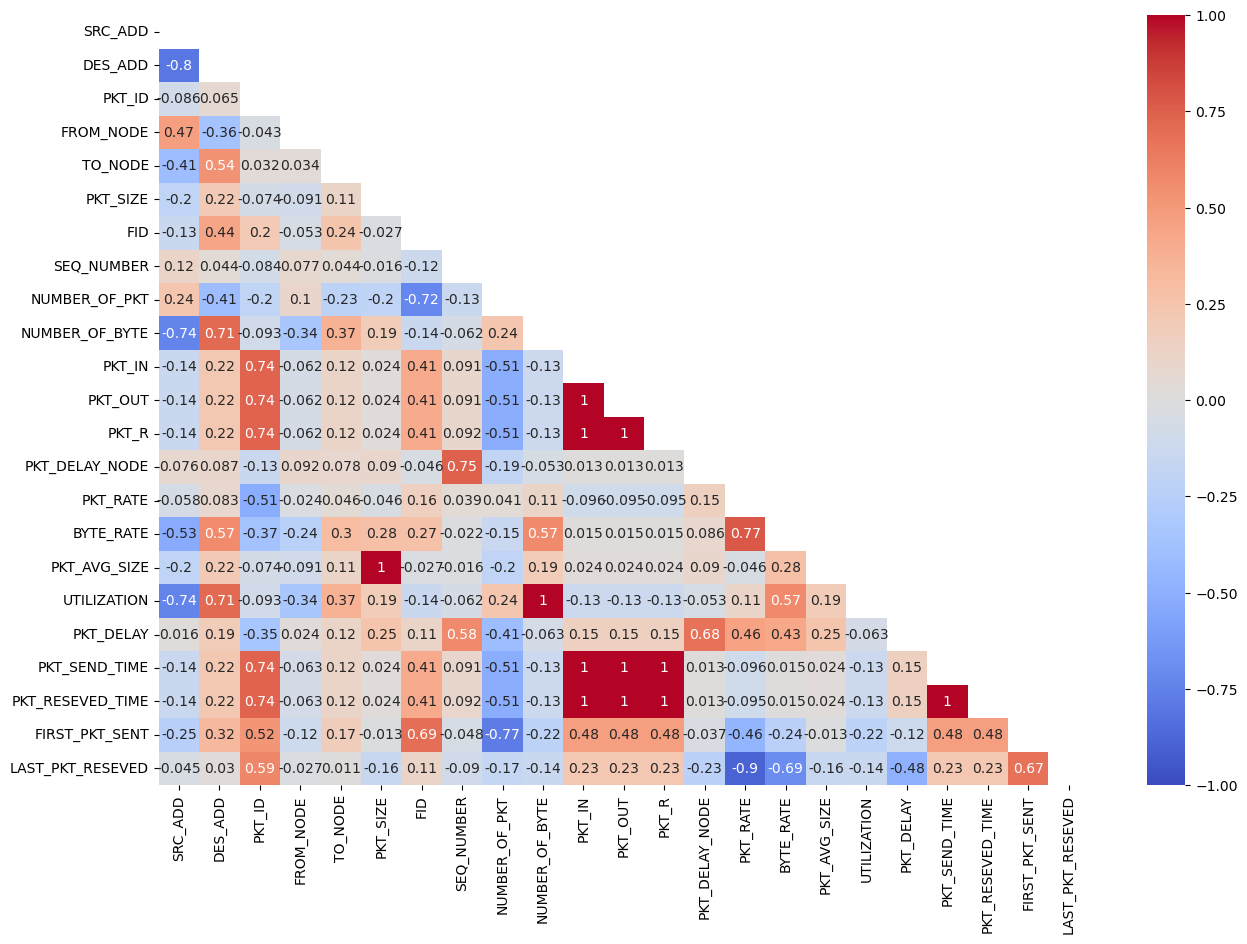

In [35]:
# Generate correlation matrix
correlation_matrix = numeric_columns.corr()

# Generate mask
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True,center=0, cmap="coolwarm", vmax=1.0, vmin=-1.0, mask=mask)
plt.show()

**Highly (corr>0.9) correlating items:**
* PKT_IN and PKT_OUT
* PKT-R and PKT_IN
* PKT_R and PKT_OUT
* PKT_AVG_SIZE and PKT_SIZE
* PKT_SEND_TIME and PKT_RESEVED_TIME
* UTILIZATION and NUMBER_OF_BYTE
* PKT_SENT_TIME and PKT_IN, PKT_R, PKT_OUT
* PKT_RESEVED_TIME and PKT_IN, PKT_R, PKT_OUT

So, `PKT_IN`, `PKT_OUT`, `PKT_R`, `PKT_AVG_SIZE`, `PKT_SEND_TIME` and `NUMBER_OF_BYTES` will be removed to avoid collinearity.  

In [8]:
network_df1 = network_df.drop(columns=['PKT_IN','PKT_OUT', 'PKT_R', 'PKT_AVG_SIZE', 'PKT_SEND_TIME', 'NUMBER_OF_BYTE'])

In [9]:
#checking corr once again
# Select only numeric columns from network_df
numeric_columns = network_df1.select_dtypes(include='number')

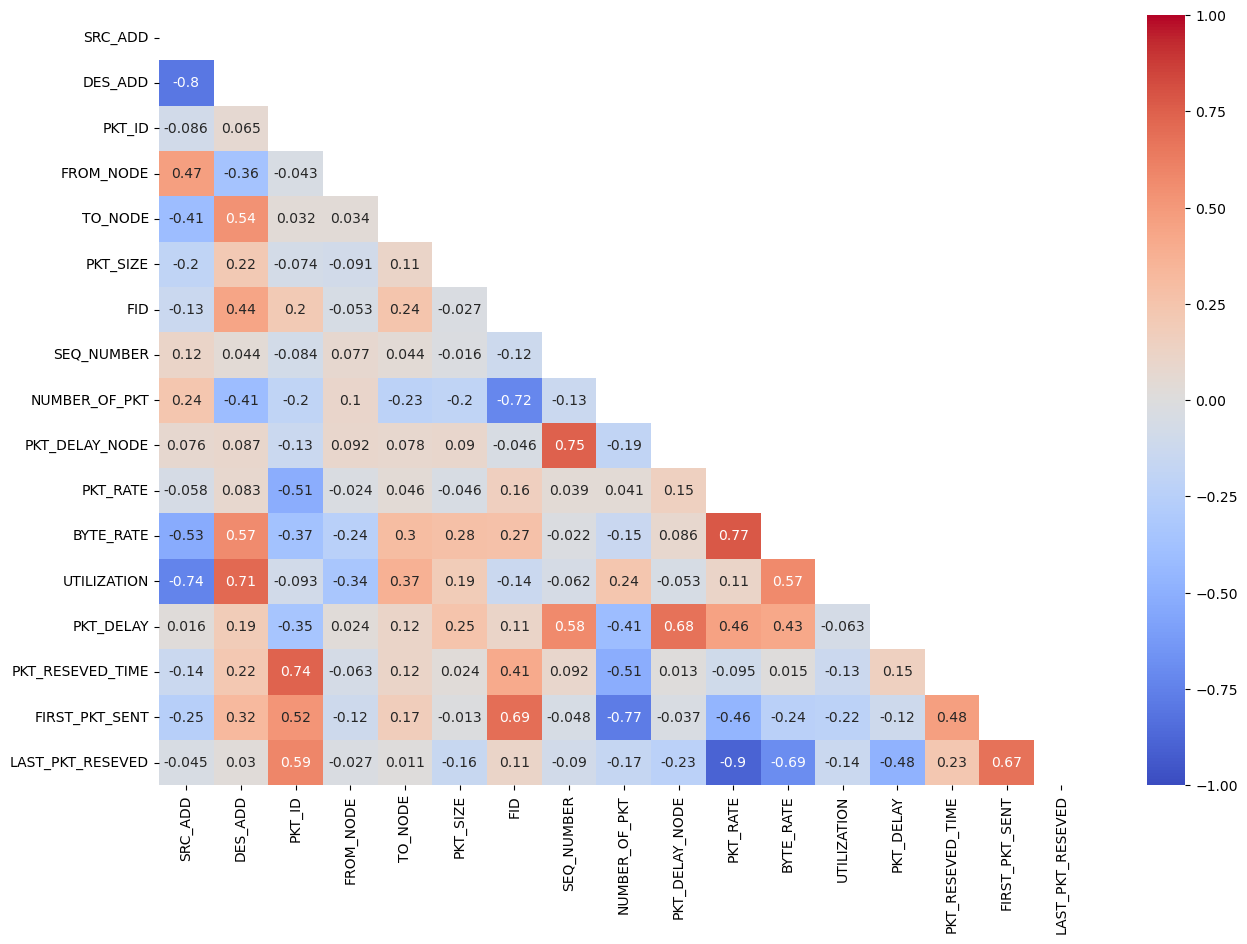

In [11]:
# Generate correlation matrix
correlation_matrix = numeric_columns.corr()

# Generate mask
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True,center=0, cmap="coolwarm", vmax=1.0, vmin=-1.0, mask=mask)
plt.show()

**No more highly correlated independent variables.**

### C. Data Analysis

Now that we've verified that data is clean, let's do some analysis to address our original question:
<font color='red'>what are the characteristics of the packets that account for malicious network traffic? </font>

#### a. Univariate Analysis - Categorical¶

Let's look at the variable of interest again, `PKT_CLASS`:

In [39]:
# Check the distribution of normal vs. malicisous traffic
network_df1['PKT_CLASS'].value_counts()/network_df.shape[0]*100.0

Normal        89.600022
UDP-Flood      9.318600
Smurf          0.582690
SIDDOS         0.308469
HTTP-FLOOD     0.190219
Name: PKT_CLASS, dtype: float64

<AxesSubplot: >

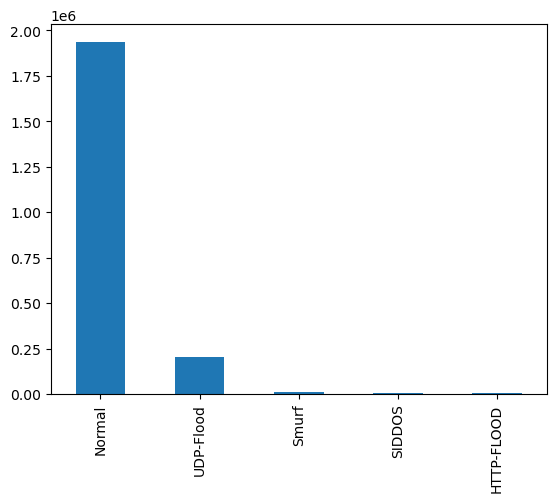

In [40]:
network_df1['PKT_CLASS'].value_counts().plot(kind='bar')

We see above, there is about `90/10` split of `normal` and `malicious` traffic. `~9%` of malicious traffic is **UDP-Flood** and the 
rest marginally distributed between `Smurf`, `SIDDOS` and `HTTP-FLOOD`.

Let's take a look at the network traffic overall.

Split the data into categorical and numerical variables, and do some EDA for both types.



In [41]:
network_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 22 columns):
 #   Column            Dtype  
---  ------            -----  
 0   SRC_ADD           float64
 1   DES_ADD           float64
 2   PKT_ID            int64  
 3   FROM_NODE         int64  
 4   TO_NODE           int64  
 5   PKT_TYPE          object 
 6   PKT_SIZE          int64  
 7   FLAGS             object 
 8   FID               int64  
 9   SEQ_NUMBER        int64  
 10  NUMBER_OF_PKT     int64  
 11  NODE_NAME_FROM    object 
 12  NODE_NAME_TO      object 
 13  PKT_DELAY_NODE    float64
 14  PKT_RATE          float64
 15  BYTE_RATE         float64
 16  UTILIZATION       float64
 17  PKT_DELAY         float64
 18  PKT_RESEVED_TIME  float64
 19  FIRST_PKT_SENT    float64
 20  LAST_PKT_RESEVED  float64
 21  PKT_CLASS         object 
dtypes: float64(10), int64(7), object(5)
memory usage: 362.7+ MB


In [42]:
# Make a new dataframe of only the categorical variables
categorical_df = network_df1.select_dtypes('object').copy()

# Check
categorical_df.head()

,PKT_TYPE,FLAGS,NODE_NAME_FROM,NODE_NAME_TO,PKT_CLASS
0,tcp,-------,Switch1,Router,Normal
1,tcp,-------,Router,server1,Normal
2,ack,-------,Router,Switch2,UDP-Flood
3,ack,-------,Router,Switch1,Normal
4,ack,-------,Router,Switch1,Normal


In [43]:
network_df1.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,...,NODE_NAME_TO,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,UTILIZATION,PKT_DELAY,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,tcp,1540,-------,4,11339,...,Router,0.0,328.240918,505490.0,0.236321,0.0,35.550032,1.000000,50.021920,Normal
1,15.00,24.15,201196,23,24,tcp,1540,-------,16,6274,...,server1,0.0,328.205808,505437.0,0.236337,0.0,20.186848,1.000000,50.030211,Normal
2,24.15,15.00,61905,23,22,ack,55,-------,16,1930,...,Switch2,0.0,328.206042,18051.3,0.008441,0.0,7.069962,1.030045,50.060221,UDP-Flood
3,24.90,9.00,443135,23,21,ack,55,-------,10,12670,...,Switch1,0.0,328.064183,18043.5,0.008437,0.0,39.647976,1.030058,50.060098,Normal
4,24.80,8.00,157335,23,21,ack,55,-------,9,4901,...,Switch1,0.0,328.113525,18046.2,0.008438,0.0,16.059813,1.030054,50.061864,Normal


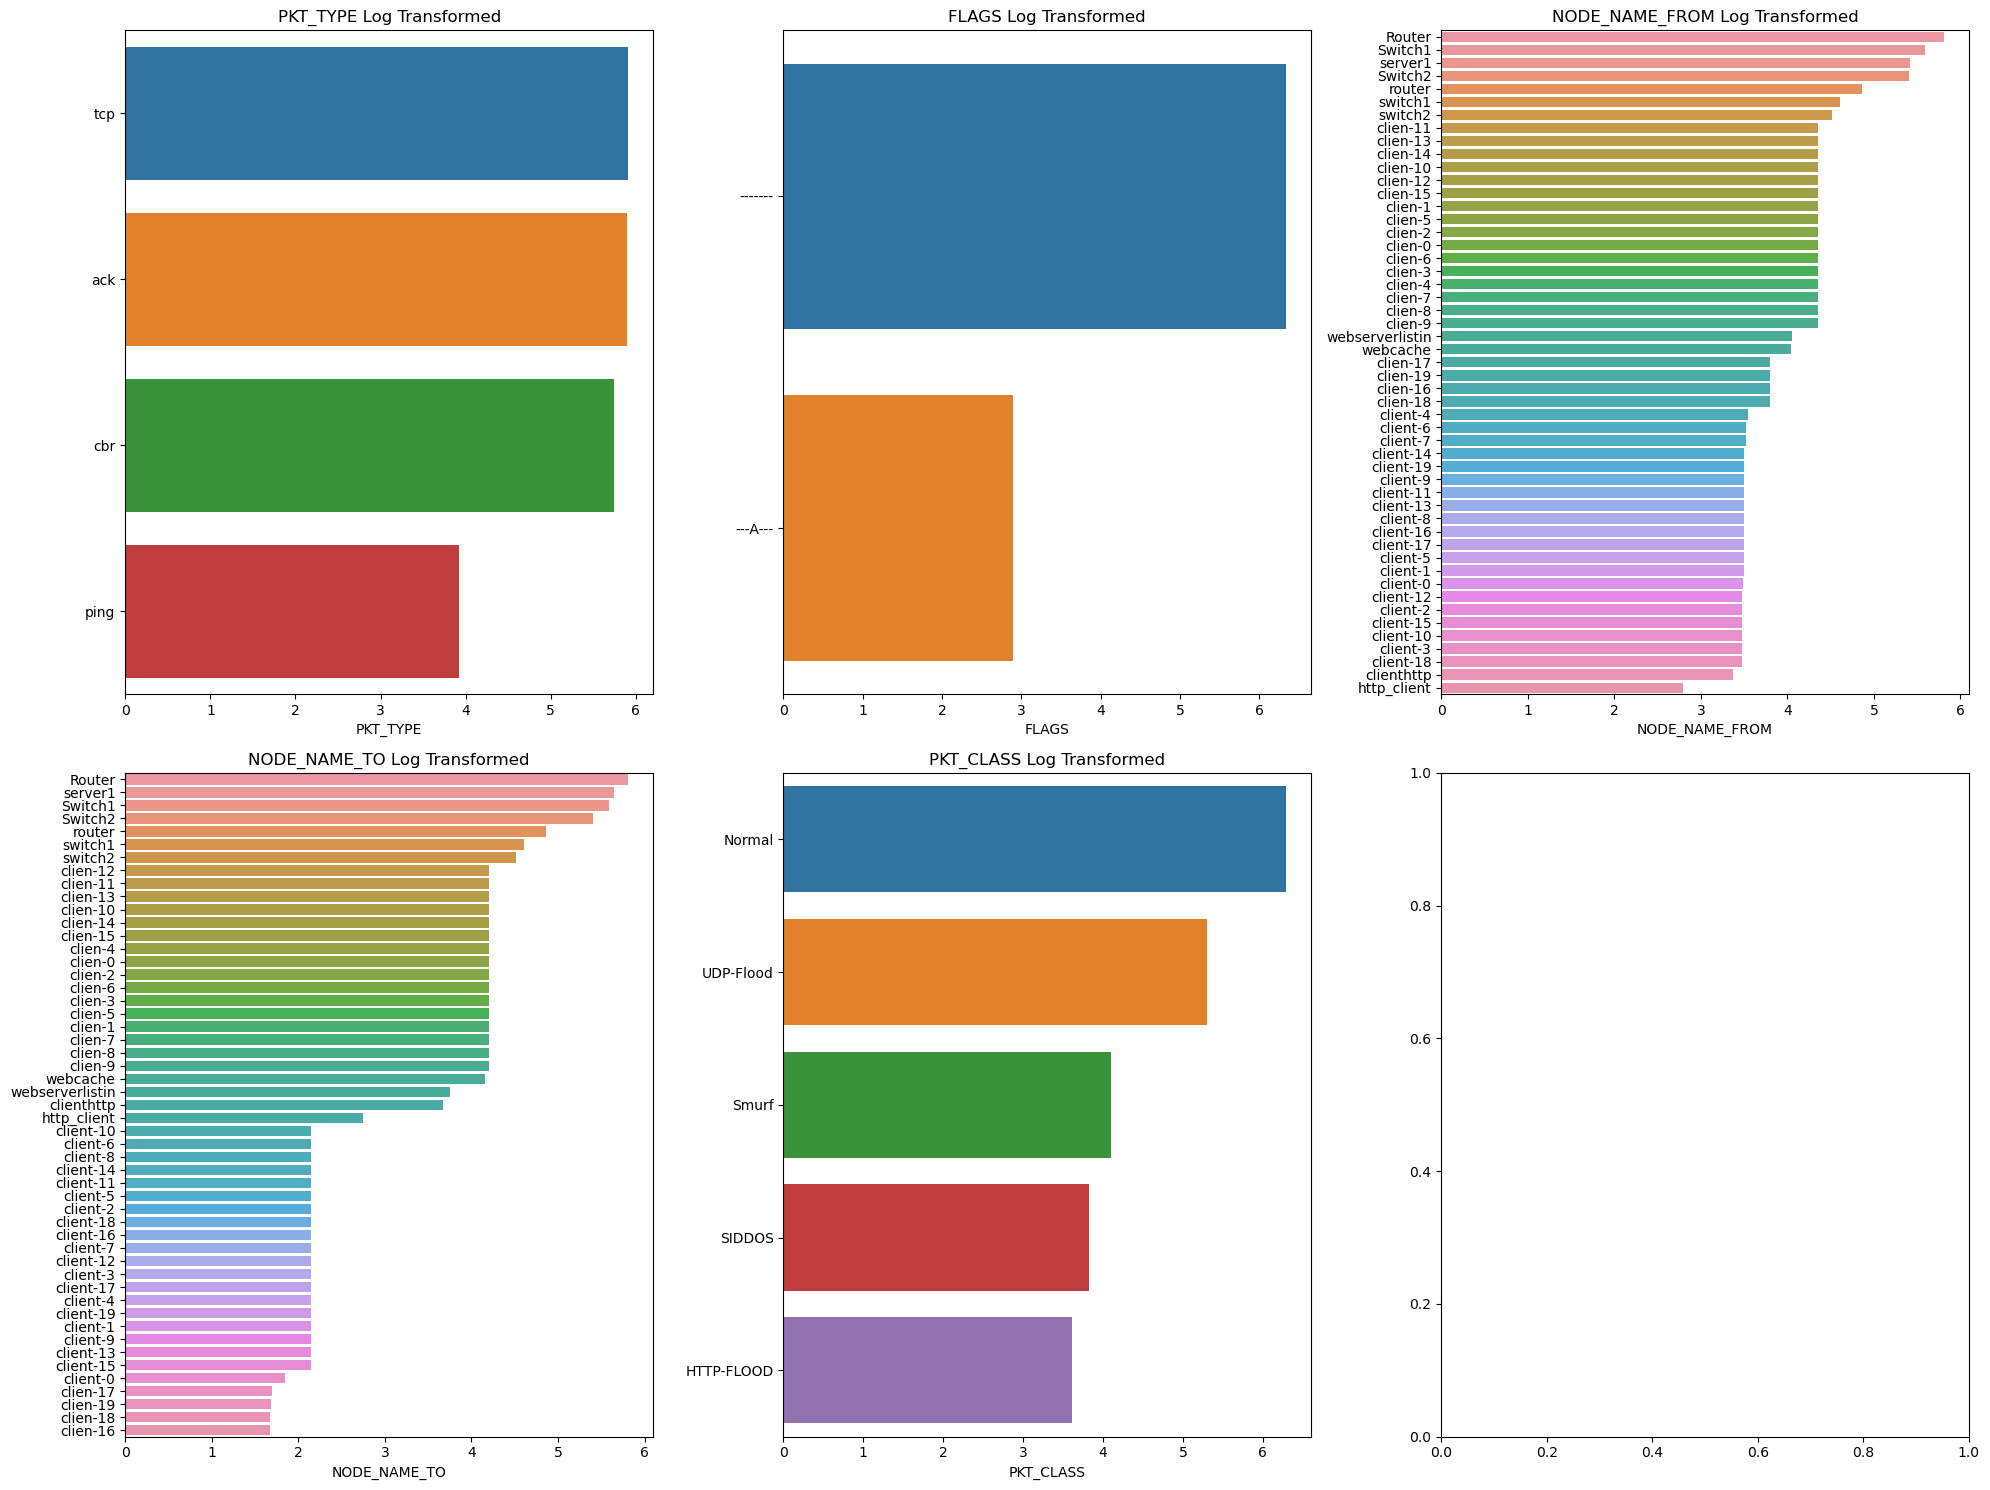

In [44]:
# visualize distribution data in each feature
col_names = categorical_df.columns
plot_num = 1

plt.subplots(2,3, figsize=(20,15))

for col in col_names:
    plt.subplot(2,3,plot_num)
    
    val= np.log10(categorical_df[col].value_counts())
    cat=categorical_df[col].value_counts().index.tolist()
    
    sns.barplot(x=val,y=cat, orient='h')
    plot_num +=1
    plt.xlabel(col)
    plt.title(col+" Log Transformed")
    
plt.tight_layout()
plt.show()

Thera are only 5 categorical variables, therefore the last subplot is empty.

In [45]:
categorical_df['FLAGS'].value_counts()

-------    2159876
---A---        792
Name: FLAGS, dtype: int64

In [46]:
categorical_df['PKT_TYPE'].value_counts()

tcp     808394
ack     787530
cbr     556344
ping      8400
Name: PKT_TYPE, dtype: int64

<font color='red'>We can see that: </font>
- The target variable (`PKT_CLASS`) is imbalanced: ~ 90% (normal) and ~ 10% (malicious)
- Majour packet types are `tcp`(~ 800K), `ack` (~ 800K) and `cbr` (~ 550K), and small amount of `ping` (~8K)
- FLAGS is exteremely imabalanced: ~2.16 mln vs 792
- The majority of network traffic goes through the routers, server and swithces
- There is only one server and 20 clients

#### b. Univariate Analysis - Numeric variables

Let's repeat the process we did above with the numeric variables:

In [47]:
network_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 22 columns):
 #   Column            Dtype  
---  ------            -----  
 0   SRC_ADD           float64
 1   DES_ADD           float64
 2   PKT_ID            int64  
 3   FROM_NODE         int64  
 4   TO_NODE           int64  
 5   PKT_TYPE          object 
 6   PKT_SIZE          int64  
 7   FLAGS             object 
 8   FID               int64  
 9   SEQ_NUMBER        int64  
 10  NUMBER_OF_PKT     int64  
 11  NODE_NAME_FROM    object 
 12  NODE_NAME_TO      object 
 13  PKT_DELAY_NODE    float64
 14  PKT_RATE          float64
 15  BYTE_RATE         float64
 16  UTILIZATION       float64
 17  PKT_DELAY         float64
 18  PKT_RESEVED_TIME  float64
 19  FIRST_PKT_SENT    float64
 20  LAST_PKT_RESEVED  float64
 21  PKT_CLASS         object 
dtypes: float64(10), int64(7), object(5)
memory usage: 362.7+ MB


In [48]:
# Get only the numeric columns
numeric_df = network_df1.select_dtypes(['int64','float64']).copy()

numeric_df.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,UTILIZATION,PKT_DELAY,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED
0,3.00,24.30,389693,21,23,1540,4,11339,16091,0.0,328.240918,505490.0,0.236321,0.0,35.550032,1.000000,50.021920
1,15.00,24.15,201196,23,24,1540,16,6274,16092,0.0,328.205808,505437.0,0.236337,0.0,20.186848,1.000000,50.030211
2,24.15,15.00,61905,23,22,55,16,1930,16092,0.0,328.206042,18051.3,0.008441,0.0,7.069962,1.030045,50.060221
3,24.90,9.00,443135,23,21,55,10,12670,16085,0.0,328.064183,18043.5,0.008437,0.0,39.647976,1.030058,50.060098
4,24.80,8.00,157335,23,21,55,9,4901,16088,0.0,328.113525,18046.2,0.008438,0.0,16.059813,1.030054,50.061864


In [49]:
numeric_df.columns

Index(['SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE', 'PKT_SIZE',
       'FID', 'SEQ_NUMBER', 'NUMBER_OF_PKT', 'PKT_DELAY_NODE', 'PKT_RATE',
       'BYTE_RATE', 'UTILIZATION', 'PKT_DELAY', 'PKT_RESEVED_TIME',
       'FIRST_PKT_SENT', 'LAST_PKT_RESEVED'],
      dtype='object')

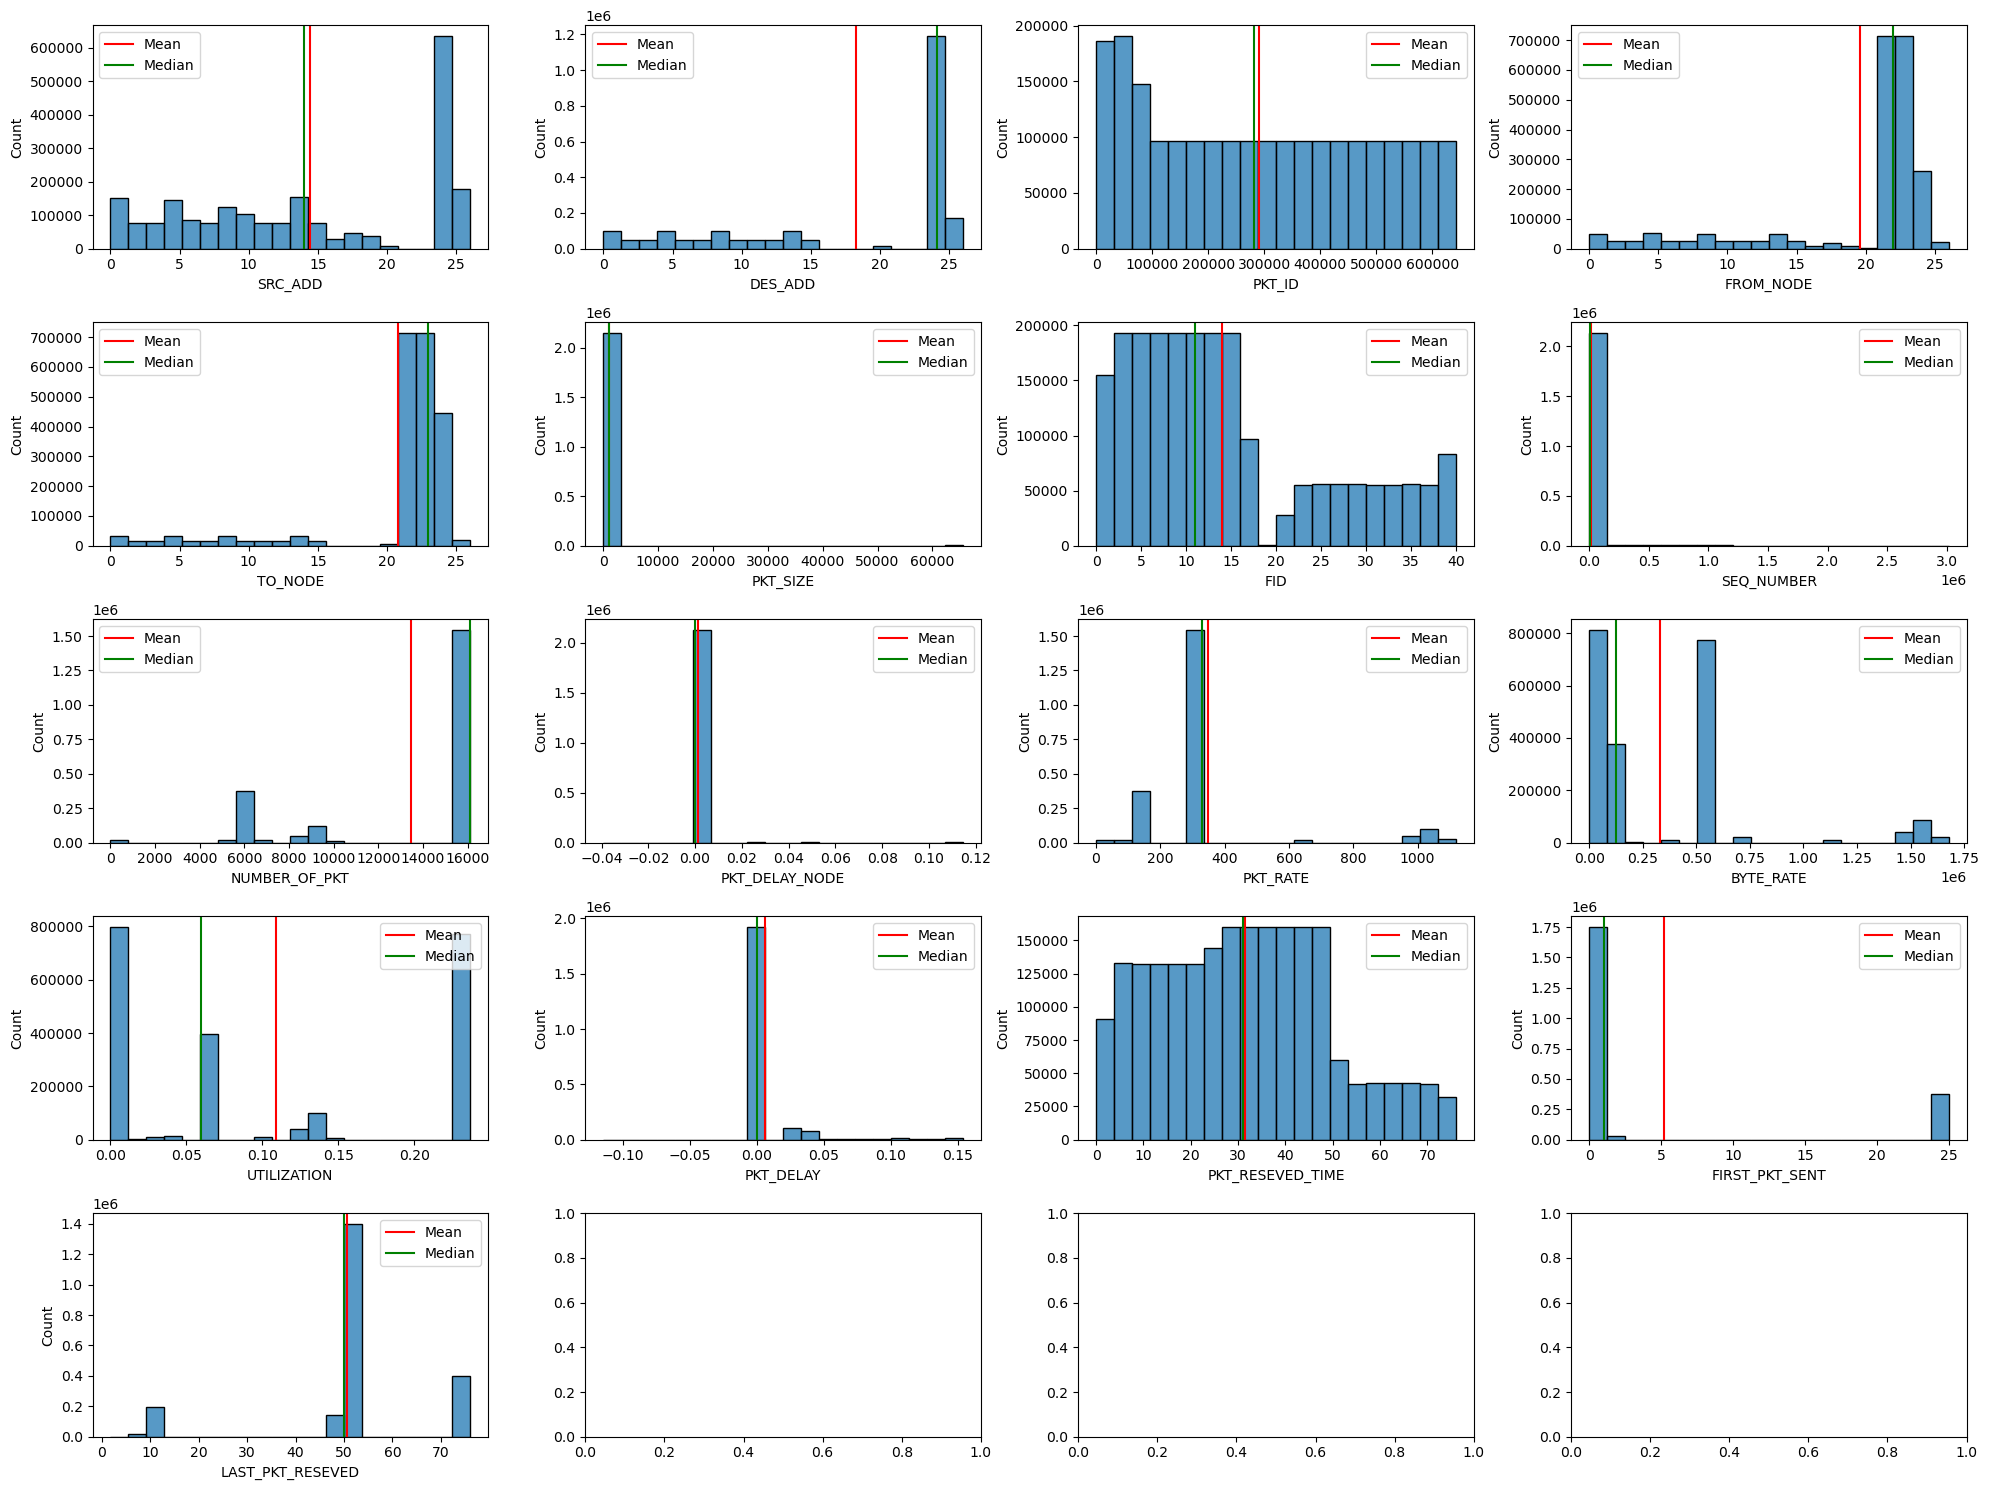

Execution time: 64.69365859031677 seconds


In [50]:
import time

# Record the start time
start_time = time.time()
# visualize distribution of unscaled data in each feature
col_names = numeric_df.columns
plot_num = 1

plt.subplots(5,4, figsize=(20,15))

for col in col_names:
    # Save column values, mean, and median to variables
    var_mean = numeric_df[col].mean()
    var_median = numeric_df[col].median()
    
    plt.subplot(5,4,plot_num)
    sns.histplot(numeric_df[col],bins=20)
    #sns.displot(var)
    plt.axvline(var_mean, c='r', label='Mean')
    plt.axvline(var_median, c='g', label='Median')
    plt.legend()
    
    plot_num +=1
    
plt.tight_layout()
plt.show()

# Record the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

The last 3 subplots are empy since there are 17 numeric variables, and shape of the subplot is 5*4.

<font color='red'> We can see that: </font>
* No normal distribution across numeric variables
* `FROM_NODE` and `TO_NODE` have similar distribution
* The distribution most resembling normal is `PKT_RESEVED_TIME`

#### c. Bivariate - Categorical Variables.

In [51]:
categorical_df.columns

Index(['PKT_TYPE', 'FLAGS', 'NODE_NAME_FROM', 'NODE_NAME_TO', 'PKT_CLASS'], dtype='object')

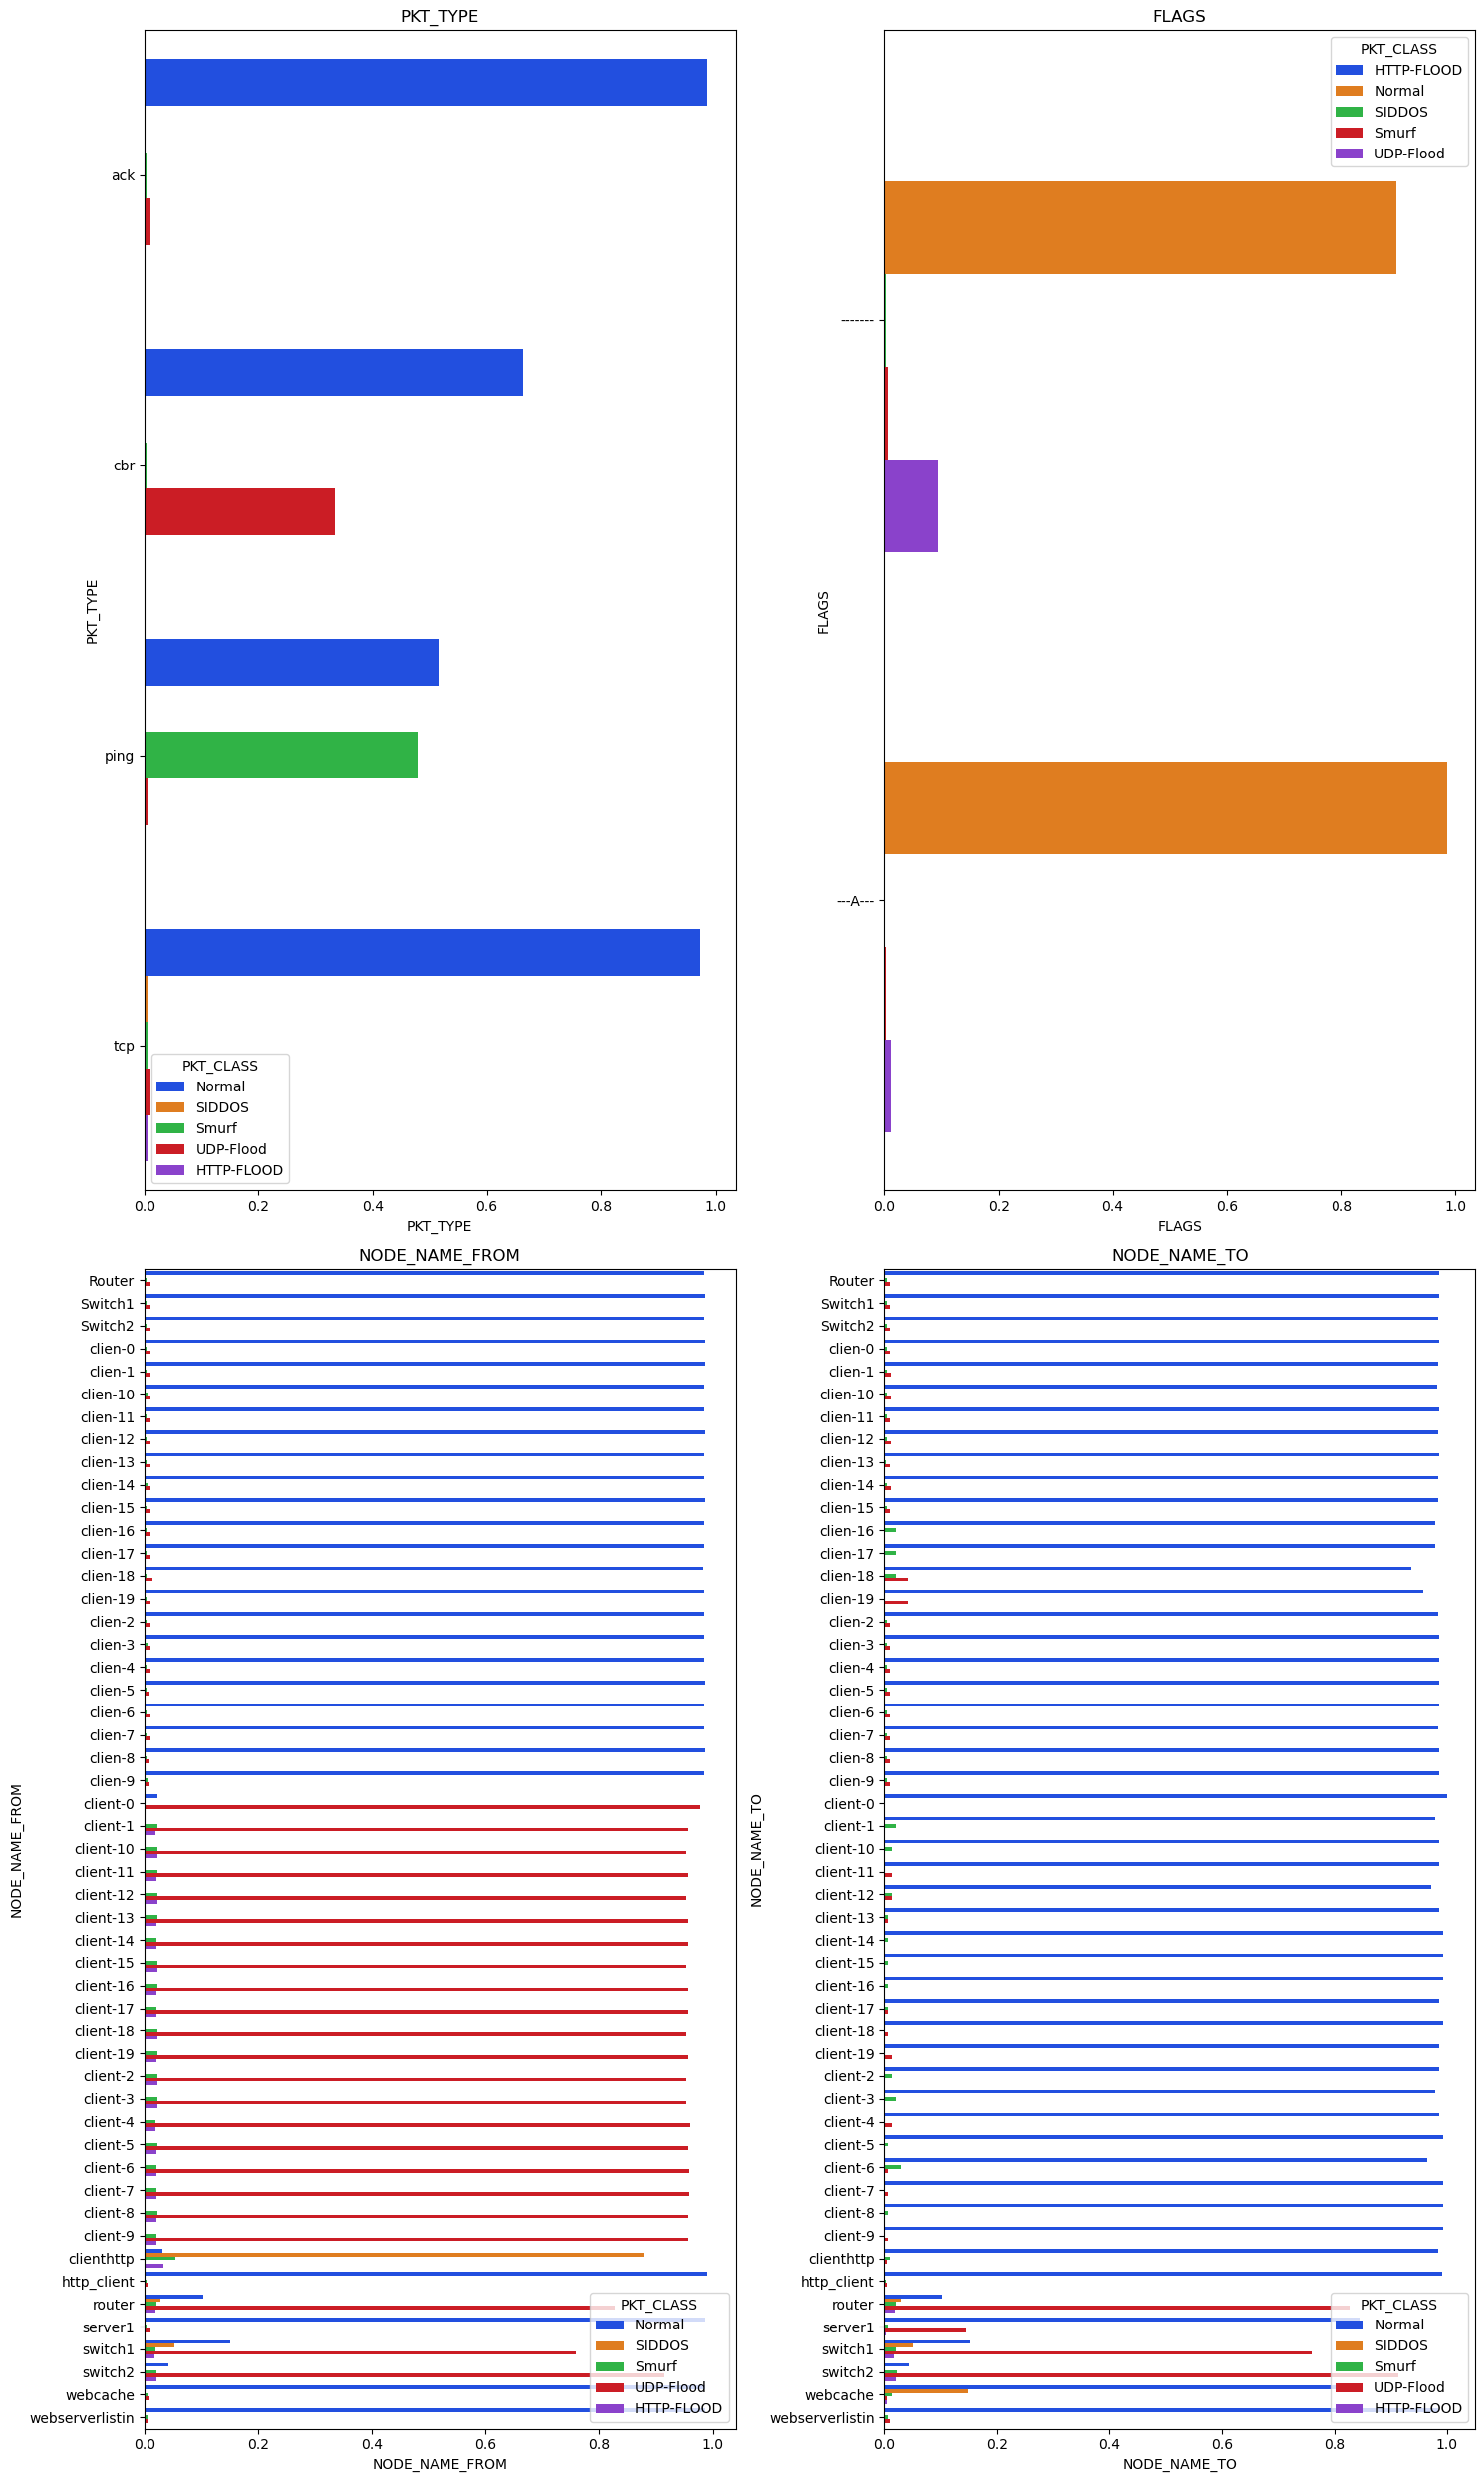

In [52]:
# visualize distribution data in each feature
col_names = categorical_df.columns
plot_num = 1

plt.subplots(2,2, figsize=(15,25))

for column in col_names[:-1]:
    plt.subplot(2,2,plot_num)

    pct_network_df = (categorical_df.groupby([column, 'PKT_CLASS'])[column]
                  .count() / categorical_df.groupby(column)[column].count()).reset_index(name='Percentage')
    
    sns.barplot(y=pct_network_df.columns[0], x=pct_network_df.columns[2], hue=pct_network_df.columns[1], data = pct_network_df, orient='h', errorbar=None, palette='bright')
    
    plot_num +=1
    plt.xlabel(column)
    plt.title(column)
    
plt.tight_layout()
plt.show()

<font color='red'>What we see that: </font>

* Client-0 to Client-19 generated most of the malicious traffic
* Switch-1, Switch-2 and router generated and received most of the malicious traffic
* Sizeble portion of `ping` and `cbr` packet types were used for malicous attacks
* Most of the packets originated from `clienthttp` node were used for `SIDDOS` attack

#### d. Bivariate Analysis - Numeric Variables

Now we will repeat the process for numeric variables.

In [53]:
# Groupby
network_df1.groupby('PKT_CLASS').mean(numeric_only=True)

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,UTILIZATION,PKT_DELAY,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED
PKT_CLASS,,,,,,,,,,,,,,,,,
HTTP-FLOOD,10.530900,24.320903,37674.932603,18.365937,22.847202,31412.905596,0.000000,1.408759,578.004866,0.014987,26.928764,7.256823e+05,0.063104,0.091904,36.222507,0.064301,12.674448
Normal,14.907160,17.616238,315193.871288,19.738564,20.627485,827.769129,12.525547,20293.422934,13953.603895,0.000806,288.520687,2.324569e+05,0.108115,0.002201,30.630324,5.594551,54.521992
SIDDOS,19.695052,24.652915,81005.515829,21.241260,22.913578,100.236459,0.674119,835.695124,7449.205551,0.000297,104.976245,1.859594e+04,0.009896,0.068330,63.170135,1.436532,74.877048
Smurf,13.654500,19.891608,215931.061795,19.327403,21.372121,21420.942097,8.013582,21169.259651,9231.683638,0.005981,197.478455,6.307281e+05,0.110399,0.034445,33.093795,3.653447,40.378111
UDP-Flood,10.159883,23.837055,67396.131223,18.145820,22.609291,1318.643193,28.693748,2684.934306,9569.803883,0.002646,940.048809,1.271845e+06,0.117692,0.035229,37.266134,1.469260,14.423046


<font color='red'>Initial thoughts about numeric features: </font>

As 99% of the data either `normal` (90%) or `UDP-Flood` (9%), let's draw our thoughts around these categories.

- HTTP-FLOOD and Smurf attacks had a way bigger `PKT_SIZE`. </br>
***That's a sign of the malicious traiffc.***
- Normal traffic has higher `number of packet`.
- Number of bytes are similar.
- `PKT_DELAY_NODE`. Normal traffic has lower delay, i.e. reached the destination node faster than malisious traffic.
- Malicous traffic had higher `packet rate`, meaning more packets are sent per unit of time. </br>
***This might be a very good predictor, as DDOS attacks are conducted through sending enormous amount of traffic to take down the server***
- `Byte_rate`. Byte rate, is also higher at malicious traffic. </br>
***Also a good predictor since during the DDOS attacks, higher number of packets involves higher number of Byte_Rate (bytes sent per the unit of time)***
- `Average size of the packet` is lower at normal traffic.
- Not much difference in network utilization </br>
***This is quite surprising since network utilisation has to be higher for the malicious traffic***
- `PKT_DELAY`. Total travel time from source to desitination of normal network is considerably lower than malicious traffic. </br>
***Due to server gets flooded, malicious traffic generally has higher delay***

In [54]:
# for the bivariate analysis, adding target class to the numeric dataset
numeric_df['PKT_CLASS'] = network_df1['PKT_CLASS']

In [55]:
numeric_df

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,UTILIZATION,PKT_DELAY,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,1540,4,11339,16091,0.0,328.240918,505490.0,0.236321,0.0,35.550032,1.000000,50.021920,Normal
1,15.00,24.15,201196,23,24,1540,16,6274,16092,0.0,328.205808,505437.0,0.236337,0.0,20.186848,1.000000,50.030211,Normal
2,24.15,15.00,61905,23,22,55,16,1930,16092,0.0,328.206042,18051.3,0.008441,0.0,7.069962,1.030045,50.060221,UDP-Flood
3,24.90,9.00,443135,23,21,55,10,12670,16085,0.0,328.064183,18043.5,0.008437,0.0,39.647976,1.030058,50.060098,Normal
4,24.80,8.00,157335,23,21,55,9,4901,16088,0.0,328.113525,18046.2,0.008438,0.0,16.059813,1.030054,50.061864,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160663,24.10,10.00,43184,22,10,55,11,1343,16103,0.0,328.561918,18070.9,0.008446,0.0,5.305043,1.030013,50.040562,Normal
2160664,24.12,12.00,376386,23,22,55,13,10991,16103,0.0,328.491596,18067.0,0.008446,0.0,34.528655,1.030026,50.051067,Normal
2160665,1.00,24.10,140121,21,23,1540,2,4374,16091,0.0,328.297855,505578.0,0.236321,0.0,14.438258,1.000000,50.013418,Normal
2160666,5.00,24.50,26800,5,21,1540,6,832,16091,0.0,328.204637,505434.0,0.236321,0.0,3.762597,1.000000,50.027339,Normal


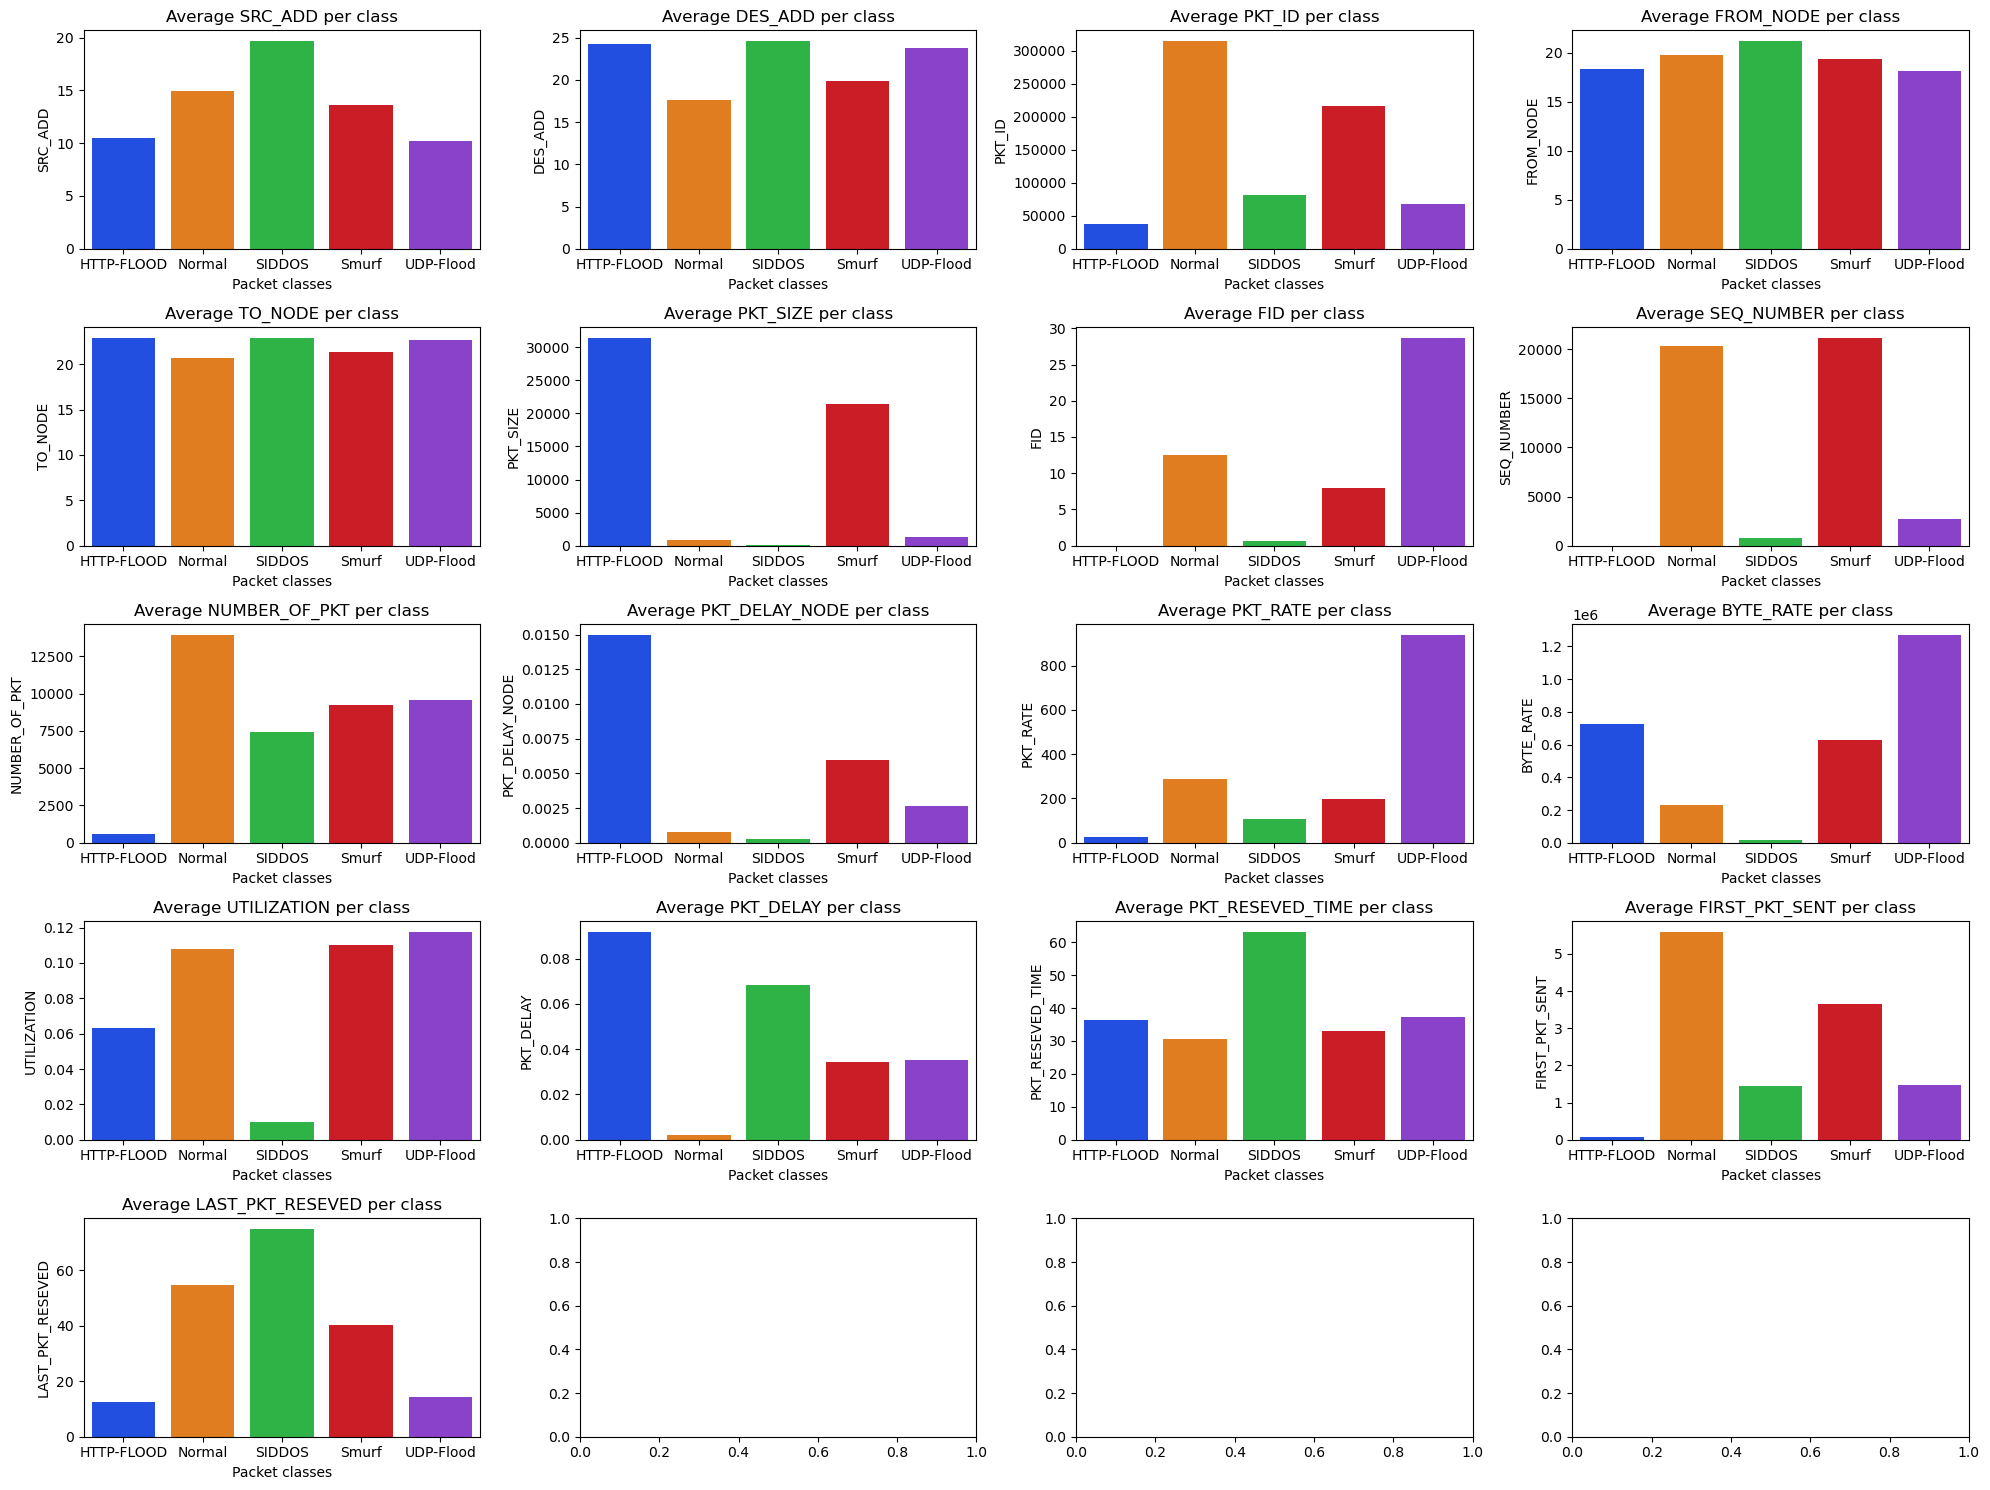

In [56]:
plot_num = 1
plt.subplots(5,4, figsize=(20,15))

for col in numeric_df.iloc[:, :-1]:
    plt.subplot(5,4,plot_num)
    
    df= numeric_df.groupby('PKT_CLASS')[col].mean().reset_index()
    
    sns.barplot(x='PKT_CLASS', y=col, data=df, palette='bright')
    plot_num +=1
    
    plt.xlabel('Packet classes')
    plt.title(f'Average {col} per class')
    
plt.tight_layout()
plt.show()

<font color='red'>The insights drawn**: </font>
* `BYTE_RATE` (row 3, col 4) - As expected, ***UDP-FLOOD packets had higher byte rate*** as DDoS attacks often involve flooding the target network or server with a high volume of traffic. This flood of traffic can lead to a significant increase in the byte rate, as the attacker attempts to consume the available bandwidth and overwhelm the target's resources
* `PKT_RATE` (row 3, col 3). ***Malicious traffic had higher packet rate***. To generate high-volume traffic, DDoS attacks often involve sending a large number of packets to the target within a short period. This results in a higher packet rate, overwhelming the target's processing capacity and network infrastructure

* `PKT_DELAY_NODE`, `Average PKT_DELAY` were ***considerably higer in malicious traffic*** which is common pattern of DDOS attack. Longer delays may occur when network devices (e.g., routers, switches) become overloaded with incoming packets, leading to increased latency or packet loss
* `PKT_SIZE` ***was higher in malicious traffic.*** DDoS attacks may involve sending packets with unusually large sizes, such as oversized ICMP (Ping) packets or fragmented packets. These larger packets can consume more bandwidth and overwhelm network devices or target systems
* `SEQ_NUMBER`  - ***Normal traffic had longer sequence of packets***
* `FID` (Flow ID) had a spike at `UDP_Flood` traffic (row 2, col 3)
* `SRC_ADD` and `DEST_ADD` - features seeem not to be significant as predictor
* `PKT_ID`- is the ID and doesn't seem to be significant as predictor
* `FROM_NODE` and `TO_NODE` - look very similar across all packet classes and also not seem to be significant predictors
* `FIRST_PKT_SENT` and `LAST_PKT_RESEVED` - ***UDP-Flood and Normal traffic have big difference***
* `PKT_RESEVED_TIME` - relatively similar avg value across all classes, with spike at SIDDOS
* `UTILIZATION` - Normal and UDP-Flood had comparable network utilisation rate


Let's look at the distribution of independent variables for each target class using boxplot and see if there are some outliers.

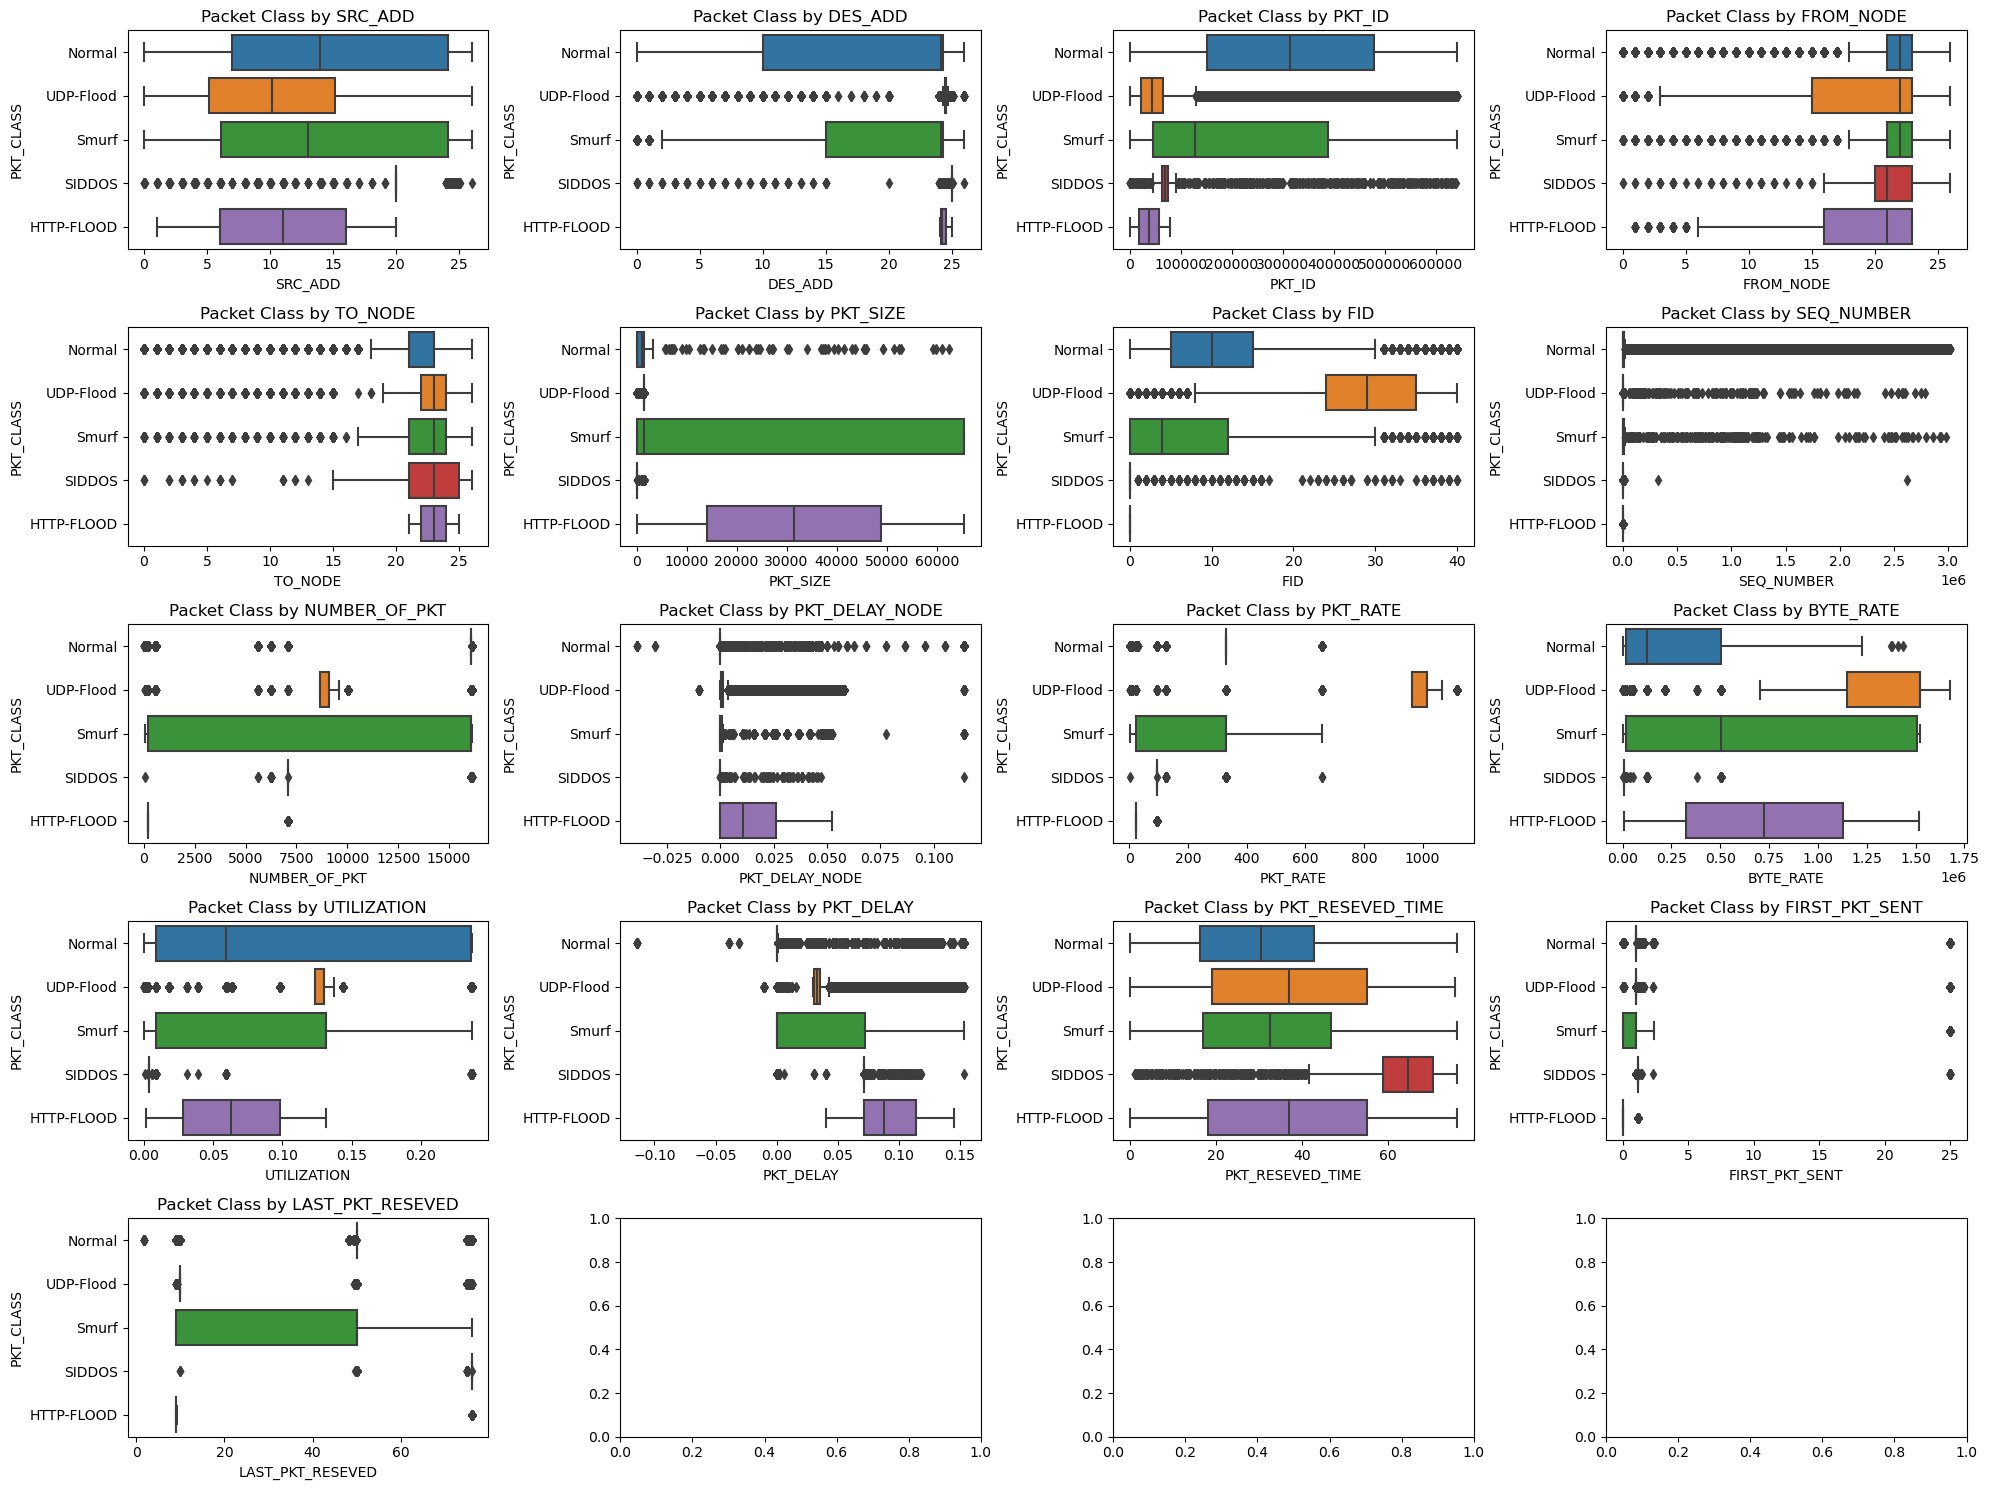

In [57]:
plot_num = 1
plt.subplots(5,4, figsize=(20,15))

for col in numeric_df.iloc[:, :-1]:
    plt.subplot(5,4,plot_num)
    plot_num +=1
    sns.boxplot(x=col, y='PKT_CLASS', data=network_df1)
    plt.title(f'Packet Class by {col}')
    
plt.tight_layout()
plt.show()

* Upper ~ 50% (Q3-Q4) of `UDP-Flood` traffic were sending ***~1000 packet per second, that might be the indicator of the malicious attack.***
* It is clearly seen that UDP-Flood traffic had higer byte rates
* Normal traffic had great number of outlier packet size, whereas UDP_Flood packet almost equally distributed among all 4 quartiles
* SMURF had greater range of packet sizes at the 4th quartile

#### e. Drop the features

Based on the domain knowledge and insights from the analysis, the following features will be dropped: `SRC_ADD`, `DES_ADD`, `PKT_ID`, `FROM_NODE`, `TO_NODE`.

`SRC_ADD` and `DES_ADD` are just names of the source and destination, and does not add any important information to the network flow.
`PKT_ID` is the ID of packets and doesn't have any predictive nature (presumably).
`FROM_NODE` and `TO_NODE` are just names of the nodes and don't add any predictive power to the model

In [10]:
network_df2 = network_df1.drop(columns=['SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE'])

In [11]:
network_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   PKT_TYPE          object 
 1   PKT_SIZE          int64  
 2   FLAGS             object 
 3   FID               int64  
 4   SEQ_NUMBER        int64  
 5   NUMBER_OF_PKT     int64  
 6   NODE_NAME_FROM    object 
 7   NODE_NAME_TO      object 
 8   PKT_DELAY_NODE    float64
 9   PKT_RATE          float64
 10  BYTE_RATE         float64
 11  UTILIZATION       float64
 12  PKT_DELAY         float64
 13  PKT_RESEVED_TIME  float64
 14  FIRST_PKT_SENT    float64
 15  LAST_PKT_RESEVED  float64
 16  PKT_CLASS         object 
dtypes: float64(8), int64(4), object(5)
memory usage: 280.2+ MB


### D. EDA Summary 

Ended up with 15 features down from 28 initial. 4 object and 11 numeric.  

From our initial analysis let's summarize what we have found out:

* Only 10% of data is of target value. We might need to merge all attack classes into one to get more balanced dataset.
* Data is relatively clean.
* Some key fields like IP, timestamps have been anonymized due to sensitivity.
* PKT_RATE, BYTE_RATE, PKT_DELAY were identified as potential strong predictors of the malicious traffic.
* Ping and cbr packets were used more than other types of packets for network attack purposes. Adversaries had used light or empty packets to conduct attacks. So, that might have been done to evade security solutions like Anti-Virus and Firewall which thoroughly examine payload.
* There is no any particular node that had initiated network attacks more than others, so all clients relativelly equally generated malicious traffic.

## 4. Preprocessing

### A. Converting categorical features to numeric

In [12]:
network_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   PKT_TYPE          object 
 1   PKT_SIZE          int64  
 2   FLAGS             object 
 3   FID               int64  
 4   SEQ_NUMBER        int64  
 5   NUMBER_OF_PKT     int64  
 6   NODE_NAME_FROM    object 
 7   NODE_NAME_TO      object 
 8   PKT_DELAY_NODE    float64
 9   PKT_RATE          float64
 10  BYTE_RATE         float64
 11  UTILIZATION       float64
 12  PKT_DELAY         float64
 13  PKT_RESEVED_TIME  float64
 14  FIRST_PKT_SENT    float64
 15  LAST_PKT_RESEVED  float64
 16  PKT_CLASS         object 
dtypes: float64(8), int64(4), object(5)
memory usage: 280.2+ MB


We will create dummy variables for the categorical features. First newly created dummy variable will be removed to avoid multicollinearity between dummy variables.

In [13]:
dummy_pkt_type = pd.get_dummies(data=network_df2['PKT_TYPE'], prefix='pkt_type_',drop_first=True).astype(int)

In [14]:
dummy_pkt_type

,pkt_type__cbr,pkt_type__ping,pkt_type__tcp
0,0,0,1
1,0,0,1
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
2160663,0,0,0
2160664,0,0,0
2160665,0,0,1
2160666,0,0,1


For the `FLAGS`, the values will be transformed into binary since there are only 2 unique values.

In [15]:
 network_df2['FLAGS'].value_counts()

-------    2159876
---A---        792
Name: FLAGS, dtype: int64

In [16]:
network_df2['FLAGS'] = network_df2['FLAGS'].replace({"-------":1, "---A---":0})

In [17]:
 network_df2['FLAGS']

0          1
1          1
2          1
3          1
4          1
          ..
2160663    1
2160664    1
2160665    1
2160666    1
2160667    1
Name: FLAGS, Length: 2160668, dtype: int64

In [18]:
network_df2['NODE_NAME_FROM'].value_counts()

Router             641580
Switch1            385484
server1            260428
Switch2            256096
router              73004
switch1             40447
switch2             32556
clien-11            22353
clien-13            22353
clien-14            22353
clien-10            22353
clien-12            22353
clien-15            22342
clien-1             22341
clien-5             22341
clien-2             22341
clien-0             22341
clien-6             22341
clien-3             22341
clien-4             22341
clien-7             22340
clien-8             22338
clien-9             22335
webserverlistin     11264
webcache            10948
clien-17             6299
clien-19             6298
clien-16             6297
clien-18             6297
client-4             3490
client-6             3336
client-7             3336
client-14            3176
client-19            3176
client-9             3176
client-11            3176
client-13            3176
client-8             3176
client-16   

As a number of unique values are high, we will bin them into the smaller groups. The groups would be `Server`, `Client`, `Router`, `Switch`.

In [19]:
def map_values(host_name):
    
    if 'server' in host_name or 'webcache' in host_name:
        return 'Server'
    elif 'clien' in host_name:
        return 'Client'
    elif 'router' in host_name or 'Router' in host_name:
        return 'Router'
    elif 'switch' in host_name or 'Switch' in host_name:
        return 'Switch'

In [20]:
network_df2['NODE_NAME_FROM'] = network_df2['NODE_NAME_FROM'].apply(map_values)

In [21]:
network_df2['NODE_NAME_FROM']

0          Switch
1          Router
2          Router
3          Router
4          Router
            ...  
2160663    Switch
2160664    Router
2160665    Switch
2160666    Client
2160667    Switch
Name: NODE_NAME_FROM, Length: 2160668, dtype: object

In [22]:
network_df['NODE_NAME_FROM']

0          Switch1
1           Router
2           Router
3           Router
4           Router
            ...   
2160663    Switch2
2160664     Router
2160665    Switch1
2160666    clien-5
2160667    Switch2
Name: NODE_NAME_FROM, Length: 2160668, dtype: object

In [23]:
network_df2['NODE_NAME_FROM'].value_counts()

Router    714584
Switch    714583
Client    448861
Server    282640
Name: NODE_NAME_FROM, dtype: int64

In [24]:
dummy_node_from = pd.get_dummies(data=network_df2['NODE_NAME_FROM'], prefix='from_', drop_first=True).astype(int)

We will apply the same operation on `NODE_NAME_TO`

In [25]:
network_df2['NODE_NAME_TO'].value_counts()

Router             641580
server1            445876
Switch1            385484
Switch2            256096
router              73013
switch1             40452
switch2             32556
clien-12            16103
clien-11            16103
clien-13            16103
clien-10            16103
clien-14            16103
clien-15            16092
clien-4             16091
clien-0             16091
clien-2             16091
clien-6             16091
clien-3             16091
clien-5             16091
clien-1             16091
clien-7             16090
clien-8             16088
clien-9             16085
webcache            14245
webserverlistin      5641
clienthttp           4734
http_client           563
client-10             140
client-6              140
client-8              140
client-14             140
client-11             140
client-5              140
client-2              140
client-18             140
client-16             140
client-7              140
client-12             140
client-3    

In [26]:
network_df2['NODE_NAME_TO'] = network_df2['NODE_NAME_TO'].apply(map_values)

In [27]:
network_df2['NODE_NAME_TO'].value_counts()

Router    714593
Switch    714588
Server    465762
Client    265725
Name: NODE_NAME_TO, dtype: int64

In [28]:
dummy_node_to = pd.get_dummies(data=network_df2['NODE_NAME_TO'], prefix='to_', drop_first=True).astype(int)

In [29]:
dummy_node_to

,to__Router,to__Server,to__Switch
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
2160663,0,0,0
2160664,0,0,1
2160665,1,0,0
2160666,0,0,1


In [30]:
#combine dummy datasets with the original data

network_df2  = pd.concat(objs=[network_df2, dummy_pkt_type, dummy_node_to, dummy_node_from], axis=1)

In [31]:
network_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 26 columns):
 #   Column            Dtype  
---  ------            -----  
 0   PKT_TYPE          object 
 1   PKT_SIZE          int64  
 2   FLAGS             int64  
 3   FID               int64  
 4   SEQ_NUMBER        int64  
 5   NUMBER_OF_PKT     int64  
 6   NODE_NAME_FROM    object 
 7   NODE_NAME_TO      object 
 8   PKT_DELAY_NODE    float64
 9   PKT_RATE          float64
 10  BYTE_RATE         float64
 11  UTILIZATION       float64
 12  PKT_DELAY         float64
 13  PKT_RESEVED_TIME  float64
 14  FIRST_PKT_SENT    float64
 15  LAST_PKT_RESEVED  float64
 16  PKT_CLASS         object 
 17  pkt_type__cbr     int32  
 18  pkt_type__ping    int32  
 19  pkt_type__tcp     int32  
 20  to__Router        int32  
 21  to__Server        int32  
 22  to__Switch        int32  
 23  from__Router      int32  
 24  from__Server      int32  
 25  from__Switch      int32  
dtypes: float64(8),

In [32]:
network_df2.head()

,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,NUMBER_OF_PKT,NODE_NAME_FROM,NODE_NAME_TO,PKT_DELAY_NODE,PKT_RATE,...,PKT_CLASS,pkt_type__cbr,pkt_type__ping,pkt_type__tcp,to__Router,to__Server,to__Switch,from__Router,from__Server,from__Switch
0,tcp,1540,1,4,11339,16091,Switch,Router,0.0,328.240918,...,Normal,0,0,1,1,0,0,0,0,1
1,tcp,1540,1,16,6274,16092,Router,Server,0.0,328.205808,...,Normal,0,0,1,0,1,0,1,0,0
2,ack,55,1,16,1930,16092,Router,Switch,0.0,328.206042,...,UDP-Flood,0,0,0,0,0,1,1,0,0
3,ack,55,1,10,12670,16085,Router,Switch,0.0,328.064183,...,Normal,0,0,0,0,0,1,1,0,0
4,ack,55,1,9,4901,16088,Router,Switch,0.0,328.113525,...,Normal,0,0,0,0,0,1,1,0,0


In [33]:
# drop the original categorical columns
network_df2.drop(columns=['PKT_TYPE', 'NODE_NAME_TO', 'NODE_NAME_FROM'], inplace=True)

### B. Merge the malicious classes together and write the preprocessed data into a csv file

In [34]:
network_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 23 columns):
 #   Column            Dtype  
---  ------            -----  
 0   PKT_SIZE          int64  
 1   FLAGS             int64  
 2   FID               int64  
 3   SEQ_NUMBER        int64  
 4   NUMBER_OF_PKT     int64  
 5   PKT_DELAY_NODE    float64
 6   PKT_RATE          float64
 7   BYTE_RATE         float64
 8   UTILIZATION       float64
 9   PKT_DELAY         float64
 10  PKT_RESEVED_TIME  float64
 11  FIRST_PKT_SENT    float64
 12  LAST_PKT_RESEVED  float64
 13  PKT_CLASS         object 
 14  pkt_type__cbr     int32  
 15  pkt_type__ping    int32  
 16  pkt_type__tcp     int32  
 17  to__Router        int32  
 18  to__Server        int32  
 19  to__Switch        int32  
 20  from__Router      int32  
 21  from__Server      int32  
 22  from__Switch      int32  
dtypes: float64(8), int32(9), int64(5), object(1)
memory usage: 305.0+ MB


In [35]:
network_df2['PKT_CLASS'].value_counts()

Normal        1935959
UDP-Flood      201344
Smurf           12590
SIDDOS           6665
HTTP-FLOOD       4110
Name: PKT_CLASS, dtype: int64

As the dataset is imbalanced, we will merge all malicious traffic classes into one

In [36]:
network_df2['PKT_CLASS'] = network_df2['PKT_CLASS'].replace(to_replace= ['Normal', 'UDP-Flood','Smurf', 'SIDDOS', 'HTTP-FLOOD'], value= ['Normal', 'Malicious', 'Malicious', 'Malicious','Malicious'])

In [37]:
network_df2['PKT_CLASS'].value_counts()

Normal       1935959
Malicious     224709
Name: PKT_CLASS, dtype: int64

In [38]:
# set malicious traffic as our positive class
network_df2['PKT_CLASS']=network_df2['PKT_CLASS'].replace({'Normal':0, 'Malicious':1})

In [39]:
network_df2['PKT_CLASS'].head()

0    0
1    0
2    1
3    0
4    0
Name: PKT_CLASS, dtype: int64

Once we finished data preprocessing stage and before starting to split the data, let's write it to an external CSV file, so we can get back to the version of the file.

In [40]:
network_df2.to_csv('network_preprocessed.csv', index=False)

In [41]:
network_df2=pd.read_csv('network_preprocessed.csv')

In [42]:
network_df2.shape

(2160668, 23)

### C. Split the dataset into train and test

In [43]:
network_df2.head()

X=network_df2.drop(columns='PKT_CLASS')
y=network_df2['PKT_CLASS']

In [40]:
X.head()

,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,NUMBER_OF_PKT,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,UTILIZATION,PKT_DELAY,...,LAST_PKT_RESEVED,pkt_type__cbr,pkt_type__ping,pkt_type__tcp,to__Router,to__Server,to__Switch,from__Router,from__Server,from__Switch
0,1540,1,4,11339,16091,0.0,328.240918,505490.0,0.236321,0.0,...,50.021920,0,0,1,1,0,0,0,0,1
1,1540,1,16,6274,16092,0.0,328.205808,505437.0,0.236337,0.0,...,50.030211,0,0,1,0,1,0,1,0,0
2,55,1,16,1930,16092,0.0,328.206042,18051.3,0.008441,0.0,...,50.060221,0,0,0,0,0,1,1,0,0
3,55,1,10,12670,16085,0.0,328.064183,18043.5,0.008437,0.0,...,50.060098,0,0,0,0,0,1,1,0,0
4,55,1,9,4901,16088,0.0,328.113525,18046.2,0.008438,0.0,...,50.061864,0,0,0,0,0,1,1,0,0


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34, stratify=y)

In [45]:
X_train

,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,NUMBER_OF_PKT,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,UTILIZATION,PKT_DELAY,...,LAST_PKT_RESEVED,pkt_type__cbr,pkt_type__ping,pkt_type__tcp,to__Router,to__Server,to__Switch,from__Router,from__Server,from__Switch
2100196,1000,1,39,933,6250,0.000000,124.941028,124941.0,0.059605,0.001403,...,75.023600,1,0,0,0,0,1,0,0,0
2114100,1000,1,39,2872,6250,0.000640,124.941028,124941.0,0.059605,0.001352,...,75.023600,1,0,0,1,0,0,0,0,1
1241396,1540,1,13,12011,16103,0.000124,328.491489,505876.0,0.236498,0.000124,...,50.021057,0,0,1,0,1,0,1,0,0
1959122,1540,1,1,6981,16091,0.000000,328.316229,505606.0,0.236321,0.000000,...,50.010675,0,0,1,1,0,0,0,0,1
1906327,1540,1,13,10667,16103,0.000000,328.491489,505876.0,0.236498,0.000385,...,50.021057,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443970,55,1,16,4214,16092,0.000000,328.206042,18051.3,0.008441,0.000000,...,50.060221,0,0,0,0,0,1,1,0,0
1764302,55,1,3,5220,16091,0.000000,328.264120,18054.5,0.008440,0.000000,...,50.048477,0,0,0,0,0,1,1,0,0
1271868,692,1,22,395,9108,0.003065,1016.542930,703448.0,0.060108,0.036351,...,9.959779,1,0,0,0,1,0,1,0,0
174628,55,1,13,14996,16103,0.000000,328.491596,18067.0,0.008446,0.000000,...,50.051067,0,0,0,0,0,0,0,0,1


 ### D. Balance the target class using Under Sampling

We will work with the undersampled dataset here, another notebook was used to work with SMOTE data.

In [46]:
from imblearn.under_sampling import RandomUnderSampler

# Define the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Fit and apply the undersampler to the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)
# Now X_train_resampled and y_train_resampled contain the balanced dataset

### E. Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train_resampled)

# Transform both the training and testing data using the fitted scaler
X_train_scaled = scaler.transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler fitted on X_train

### F. PCA

In [90]:
from sklearn.decomposition import PCA

In [91]:
pca = PCA(n_components=3)

In [92]:
X_train_pca = pca.fit_transform(X_train_scaled)

In [93]:
X_test_pca = pca.transform(X_test_scaled)

In [94]:
# Optionally, let's examine the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

Explained variance ratio: [0.23480411 0.12593859 0.11838195]


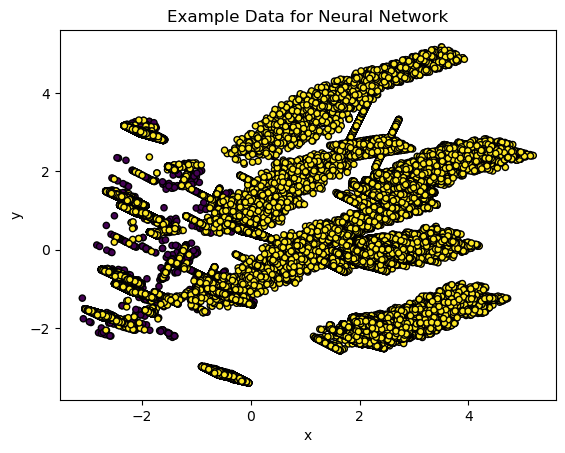

In [51]:

#Plot
plt.title("Example Data for Neural Network")
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], s=20, c=y_train_resampled, edgecolor='k')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

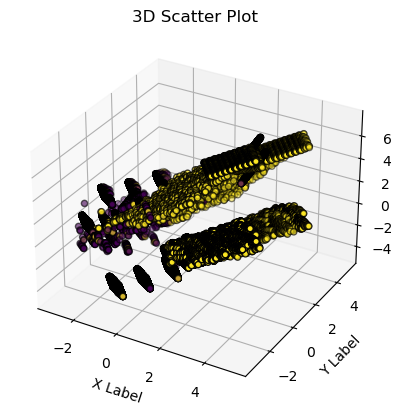

In [52]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_pca[:,0], X_train_pca[:,1], X_train_pca[:,2], s=20, c=y_train_resampled, edgecolor='k')

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

# Show plot
plt.show()

## 5.Modelling With LogReg

### 5.1 Baseline Modelling

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
import time

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [97]:
# Initialize the logistic regression model
# Initialize the logistic regression model
baseline_logreg = LogisticRegression(verbose = 1, n_jobs=-1, random_state=42)

start = time.time()

# Train the model
baseline_logreg.fit(X_train_pca, y_train_resampled)

end=time.time()
print(end-start, "seconds")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.


1.5358514785766602 seconds


In [98]:
# Predict on the training set
y_pred_train = baseline_logreg.predict(X_train_pca)

# Calculate accuracy, recall, and other metrics
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
recall_train = recall_score(y_train_resampled, y_pred_train)
f1_train = f1_score(y_train_resampled, y_pred_train)
roc_auc_train = roc_auc_score(y_train_resampled, y_pred_train)

print("Train Accuracy:", accuracy_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)
print("Train ROC AUC Score:", roc_auc_train)

Train Accuracy: 0.9328654256942325
Train Recall: 0.8735695758315533
Train F1-score: 0.9286337003020904
Train ROC AUC Score: 0.9328654256942326


In [99]:
# Make predictions on the test set
y_pred = baseline_logreg.predict(X_test_pca)
y_proba = baseline_logreg.predict_proba(X_test_pca)[:,1]

In [100]:
# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred)

# Calculate recall
recall_test = recall_score(y_test, y_pred)

# Calculate F1 score
f1_test = f1_score(y_test, y_pred)

# Calculate ROC AUC score
roc_auc_test = roc_auc_score(y_test, y_proba)

In [101]:
# Assuming you have calculated the metrics_train list or array

# Assigning to a list
metrics = [accuracy_train, accuracy_test, recall_train, recall_test]
metrics

[0.9328654256942325,
 0.9800000308546268,
 0.8735695758315533,
 0.8744159138445107]

In [102]:
# Creating a DataFrame with the metrics_train list and setting the index
metrics_df = pd.DataFrame([metrics], columns=["Train Accuracy","Test Accuracy", "Train Recall", "Test Recall"],index=["LogReg"])

# Printing the DataFrame
print(metrics_df)

        Train Accuracy  Test Accuracy  Train Recall  Test Recall
LogReg        0.932865           0.98       0.87357     0.874416


In [103]:
print("Test Accuracy:", accuracy_test)
print("Test Recall:", recall_test)
print("Test F1-score:", f1_test)
print("Test ROC AUC Score:", roc_auc_test)

Test Accuracy: 0.9800000308546268
Test Recall: 0.8744159138445107
Test F1-score: 0.9009307799293892
Test ROC AUC Score: 0.9366884907033601


For purposes of the project, we only consider accuracy and recall as the key metrics.

#### Interpretation of the Baseline Model 

We will use `statsmodels` to interpret the coefficients and their significance

In [81]:
# Interpret coefficients and p-value using stats models
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_scaled)  # Add a constant term for the intercept
logreg_stat = sm.Logit(y_train_resampled, X_train_sm)
result = logreg_stat.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.200131
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:              PKT_CLASS   No. Observations:               314592
Model:                          Logit   Df Residuals:                   314569
Method:                           MLE   Df Model:                           22
Date:                Fri, 12 Apr 2024   Pseudo R-squ.:                  0.7113
Time:                        21:16:51   Log-Likelihood:                -62960.
converged:                       True   LL-Null:                   -2.1806e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0634      1.686      3.003      0.003       1.758       8.368
x1             0.3653      0

We will upadte the coefficients with their appropriate feature names.

In [82]:
# Extract coefficients and p-values
result_summary = result.summary().tables[1].data

# Create a DataFrame to store coefficients and their p-values
result_summary = pd.DataFrame(result_summary[1:], columns=['Features','Coefficient', 'Standard Error', 'Z-value', 'P-value', 'Lower CI', 'Upper CI'])
result_summary.iloc[1:, 0] = X_train.columns
# Convert coefficient and p-value columns to numeric
result_summary['Coefficient'] = pd.to_numeric(result_summary['Coefficient'])
result_summary['P-value'] = pd.to_numeric(result_summary['P-value'])

# Print the DataFrame
print(result_summary)

            Features  Coefficient Standard Error    Z-value  P-value  \
0              const       5.0634          1.686      3.003    0.003   
1           PKT_SIZE       0.3653          0.325      1.124    0.261   
2              FLAGS       0.0243          0.006      3.835    0.000   
3                FID       0.0078          0.020      0.397    0.691   
4         SEQ_NUMBER      -0.0448          0.012     -3.785    0.000   
5      NUMBER_OF_PKT       1.9101          0.208      9.205    0.000   
6     PKT_DELAY_NODE      -0.3277          0.060     -5.430    0.000   
7           PKT_RATE      -3.7425          0.882     -4.241    0.000   
8          BYTE_RATE       1.1292          1.557      0.725    0.468   
9        UTILIZATION      -2.5602          0.386     -6.634    0.000   
10         PKT_DELAY       1.0625          0.057     18.521    0.000   
11  PKT_RESEVED_TIME       0.0141          0.011      1.332    0.183   
12    FIRST_PKT_SENT      -6.3614          1.646     -3.865    0

In [83]:
results_df=result_summary[['Features', 'Coefficient', 'P-value']]

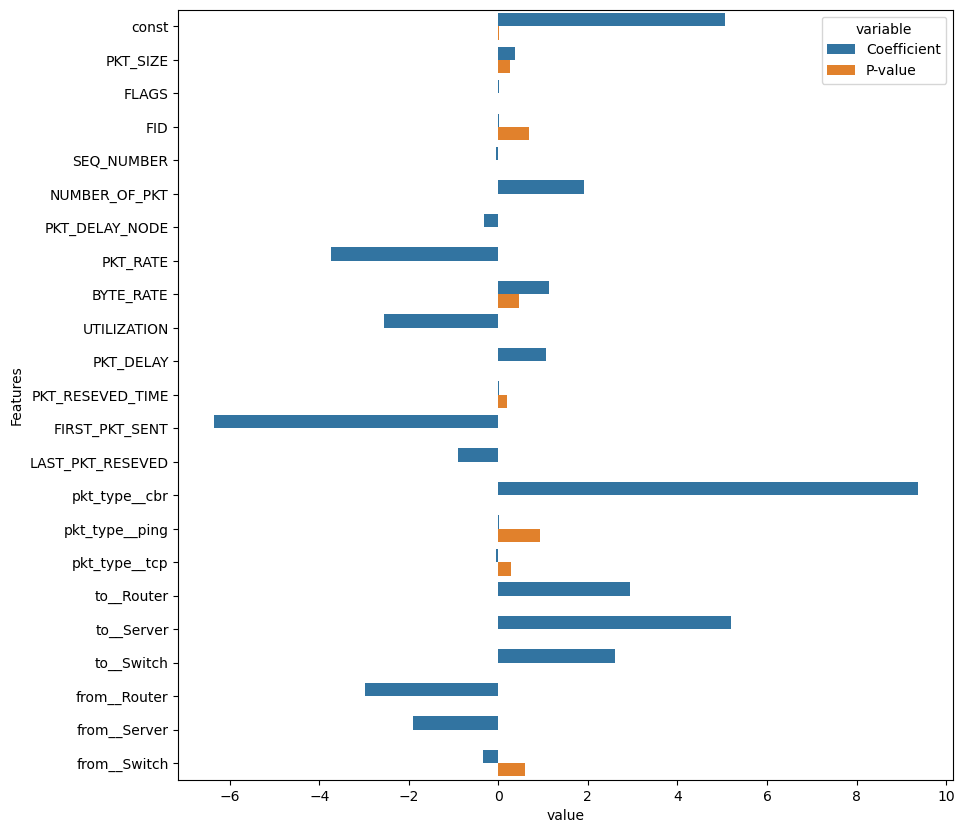

In [87]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 10))

sns.barplot(x='value', y='Features',hue='variable', data=pd.melt(results_df, id_vars='Features') )
#plt.xlim(-1.1, 1.1)
    
plt.show()

<font color='red'><b>Insights:</b></font>
* As expected `BYTE_RATE`, `PKT_RATE`, `Number_OF_PKT`, `Utilisation` are strong predictor of the malicious traffic (p-value=~0)
* Surprisingly `pkt_cbr` is a strong predictor
* Newly created dummy variables (to_Router, to_Server, to_Switch, from_Router, from_Server, from_Switch) showed high predicitve power

#### Performance Evaluation of the Baseline Model

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Normal Traffic", "Predicted Malicious Traffic"],
    index=["True Normal Traffic", "True Malicious Traffic"]
)

Let's see the confusion matrix

<AxesSubplot: >

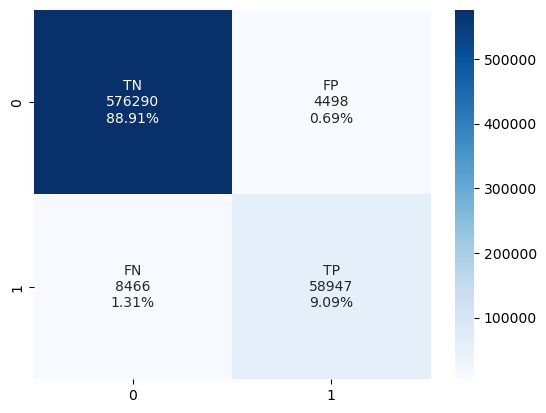

In [89]:
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

We can see that FN rate is quite high. ***This metric is of high importance as it's accountable for the malicious traffic that were marked as normal.***
Let's closer see the metrics of the positive class.

In [90]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# First calculate precision and recall using the default (0.5) cut-off
y_threshold = np.where(y_proba > 0.5, 1, 0)

In [91]:
print("Threshold of 0.5:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}")
print(f"F1-score: {f1_score(y_test, y_threshold)}")
print("")

Threshold of 0.5:
Precision score: 0.9291039483016786
Recall score: 0.8744159138445107
F1-score: 0.9009307799293892



`Recall` score is **87.44%** which represents the proportion of actual positive cases that were correctly identified by a classification model out of all actual positive cases in the dataset.

In [92]:
from sklearn.metrics import accuracy_score

# Vary thresholds by 0 from 0.05 to 0.95
thresholds = np.arange(0, 0.99, 0.05)

precisions = list()
recalls = list()

start=time.time()
for threshold in thresholds:

    # Apply threshold
    y_threshold = np.where(y_proba > threshold, 1, 0)

    # Calculate precision and recall
    precision = precision_score(y_test, y_threshold)
    recall = recall_score(y_test, y_threshold)

    # Append to list
    precisions.append(precision)
    recalls.append(recall)
    
end=time.time()
print (end-start, "seconds")

4.4718077182769775 seconds


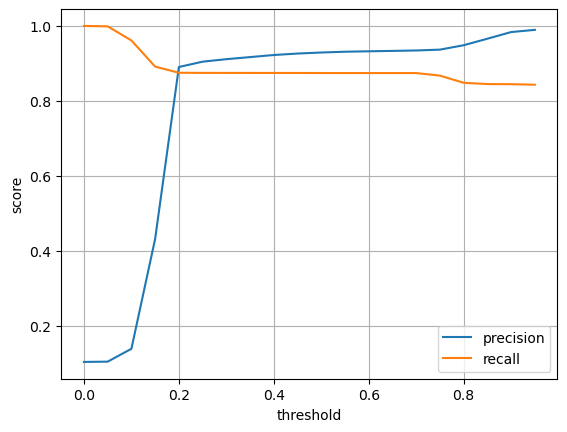

In [93]:
# Visualize the result
plt.figure()
plt.plot(thresholds, precisions, label='precision')
plt.plot(thresholds, recalls, label='recall')
plt.xlabel('threshold')
plt.ylabel('score')
plt.grid()
plt.legend()
plt.show()

Any `threshold` between ~ 0.1 and ~ 0.9 gives the same precision and recall rates. So, lowering the `threshold` **would not give us better recall rate**.  

***The True Positive Rate (TPR)*** measures what proportion of a model assigned to positive are actually members of the positive class:

In [95]:
#y_proba = baseline_logreg.predict_proba(X_test_scaled)[:,1]
y_binary = np.where(y_proba > 0.5, 1, 0)

TPR = recall_score(y_test, y_binary)
print(f"TPR: {TPR}")

TPR: 0.8744159138445107


**Basically, it's our Recall.**

On the other hand, the ***False Positive Rate (FPR)*** will be the proportion of all negatives that we incorrectly identified as positive, that is:

In [96]:
def false_positive_rate(y_true, y_pred):

    false_positives = (y_true == 0) & (y_pred == 1) # find all values where y is negative
                                                    # but we predicted positive
    false_positive_number = false_positives.sum()

    true_negatives = (y_true == 0) & (y_pred == 0)  # find all values where y is negative
                                                    # and we predicted negative
    true_negative_number = true_negatives.sum()

    # Finally, find the ratio of (FP) to (TN + FP)
    FPR = false_positive_number/(true_negative_number + false_positive_number)

    return FPR

In [97]:
#y_proba = baseline_logreg.predict_proba(X_test_scaled)[:,1]
y_binary = np.where(y_proba > 0.5, 1, 0)

FPR = false_positive_rate(y_test, y_binary)
print(f"FPR: {FPR}")

FPR: 0.007744650371564151


In [98]:
thresholds = np.linspace(0, 1, 100)

# Iterate over the thresholds and compute the positive and negative recall
true_positive_rates = []
false_positive_rates = []

thresholds = np.linspace(0, 1, 50)
for threshold in thresholds:

    # Apply the cutoff and calculate the positive and negative recall
    y_pred = np.where(y_proba > threshold, 1, 0)

    tpr = recall_score(y_test, y_pred)
    fpr = false_positive_rate(y_test, y_pred)

    true_positive_rates.append(tpr)
    false_positive_rates.append(fpr)

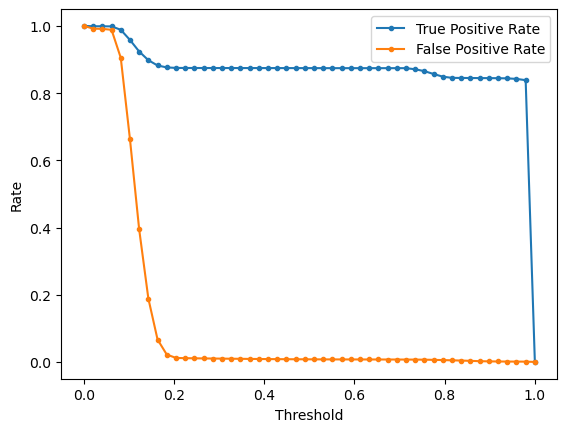

In [99]:
plt.figure()
plt.plot(thresholds, true_positive_rates, label='True Positive Rate', marker='.')
plt.plot(thresholds, false_positive_rates, label='False Positive Rate', marker='.')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.legend()
plt.show()

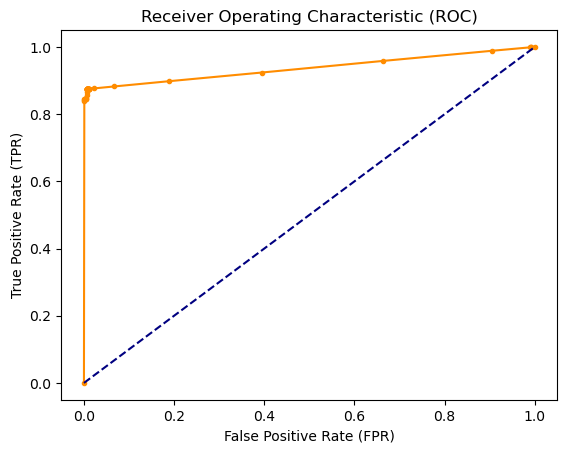

In [100]:
# True positive rate (TPR) = recall
tprs = np.array(true_positive_rates)

# False positive rate (FPR)
fprs = np.array(false_positive_rates)

plt.figure()
plt.plot(fprs, tprs, color='darkorange', marker='.')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.show()

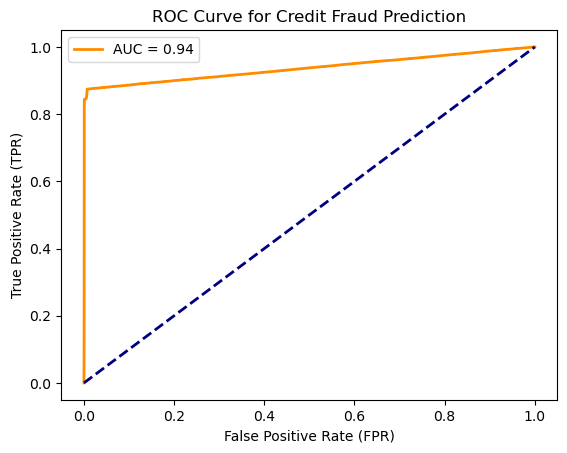

Area under curve (AUC):0.9366884907033601



In [101]:
from sklearn.metrics import roc_curve, roc_auc_score

fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fprs, tprs, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Credit Fraud Prediction')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC):{roc_auc}')
print()

It indicates that the model is very effective at distinguishing between the positive and negative classes, ***with a high true positive rate (TPR) and a low false positive rate (FPR)***.

An AUC value of `0.94` indicates the probability of ranking a randomly chosen positive instance higher than a randomly chosen negative instance.

**Summary of baseline model evaluation:**

* Accuracy is 98%
* Recall is 87.44%
* AUC score is 94%
* F1 score is 94%

These will be the key metrics we would like to improve with advanced models in Sprint 3. ***The main focus will be at Recall as the impact of misclassifying malicious attack is paramount.***

### 5.2 Analysis of False Negative Values

Let's have a look into False Negative

In [215]:
y_pred = np.where(y_proba > 0.5, 1, 0)

In [216]:
false_negatives=X_test[(y_pred==0) & (y_test==1)]

In [103]:
# Export DataFrame to CSV
false_negatives.to_csv('false_negatatives.csv', index=False)  # Set index=False to exclude row numbers in the CSV

In [217]:
false_negatives.shape

(8466, 22)

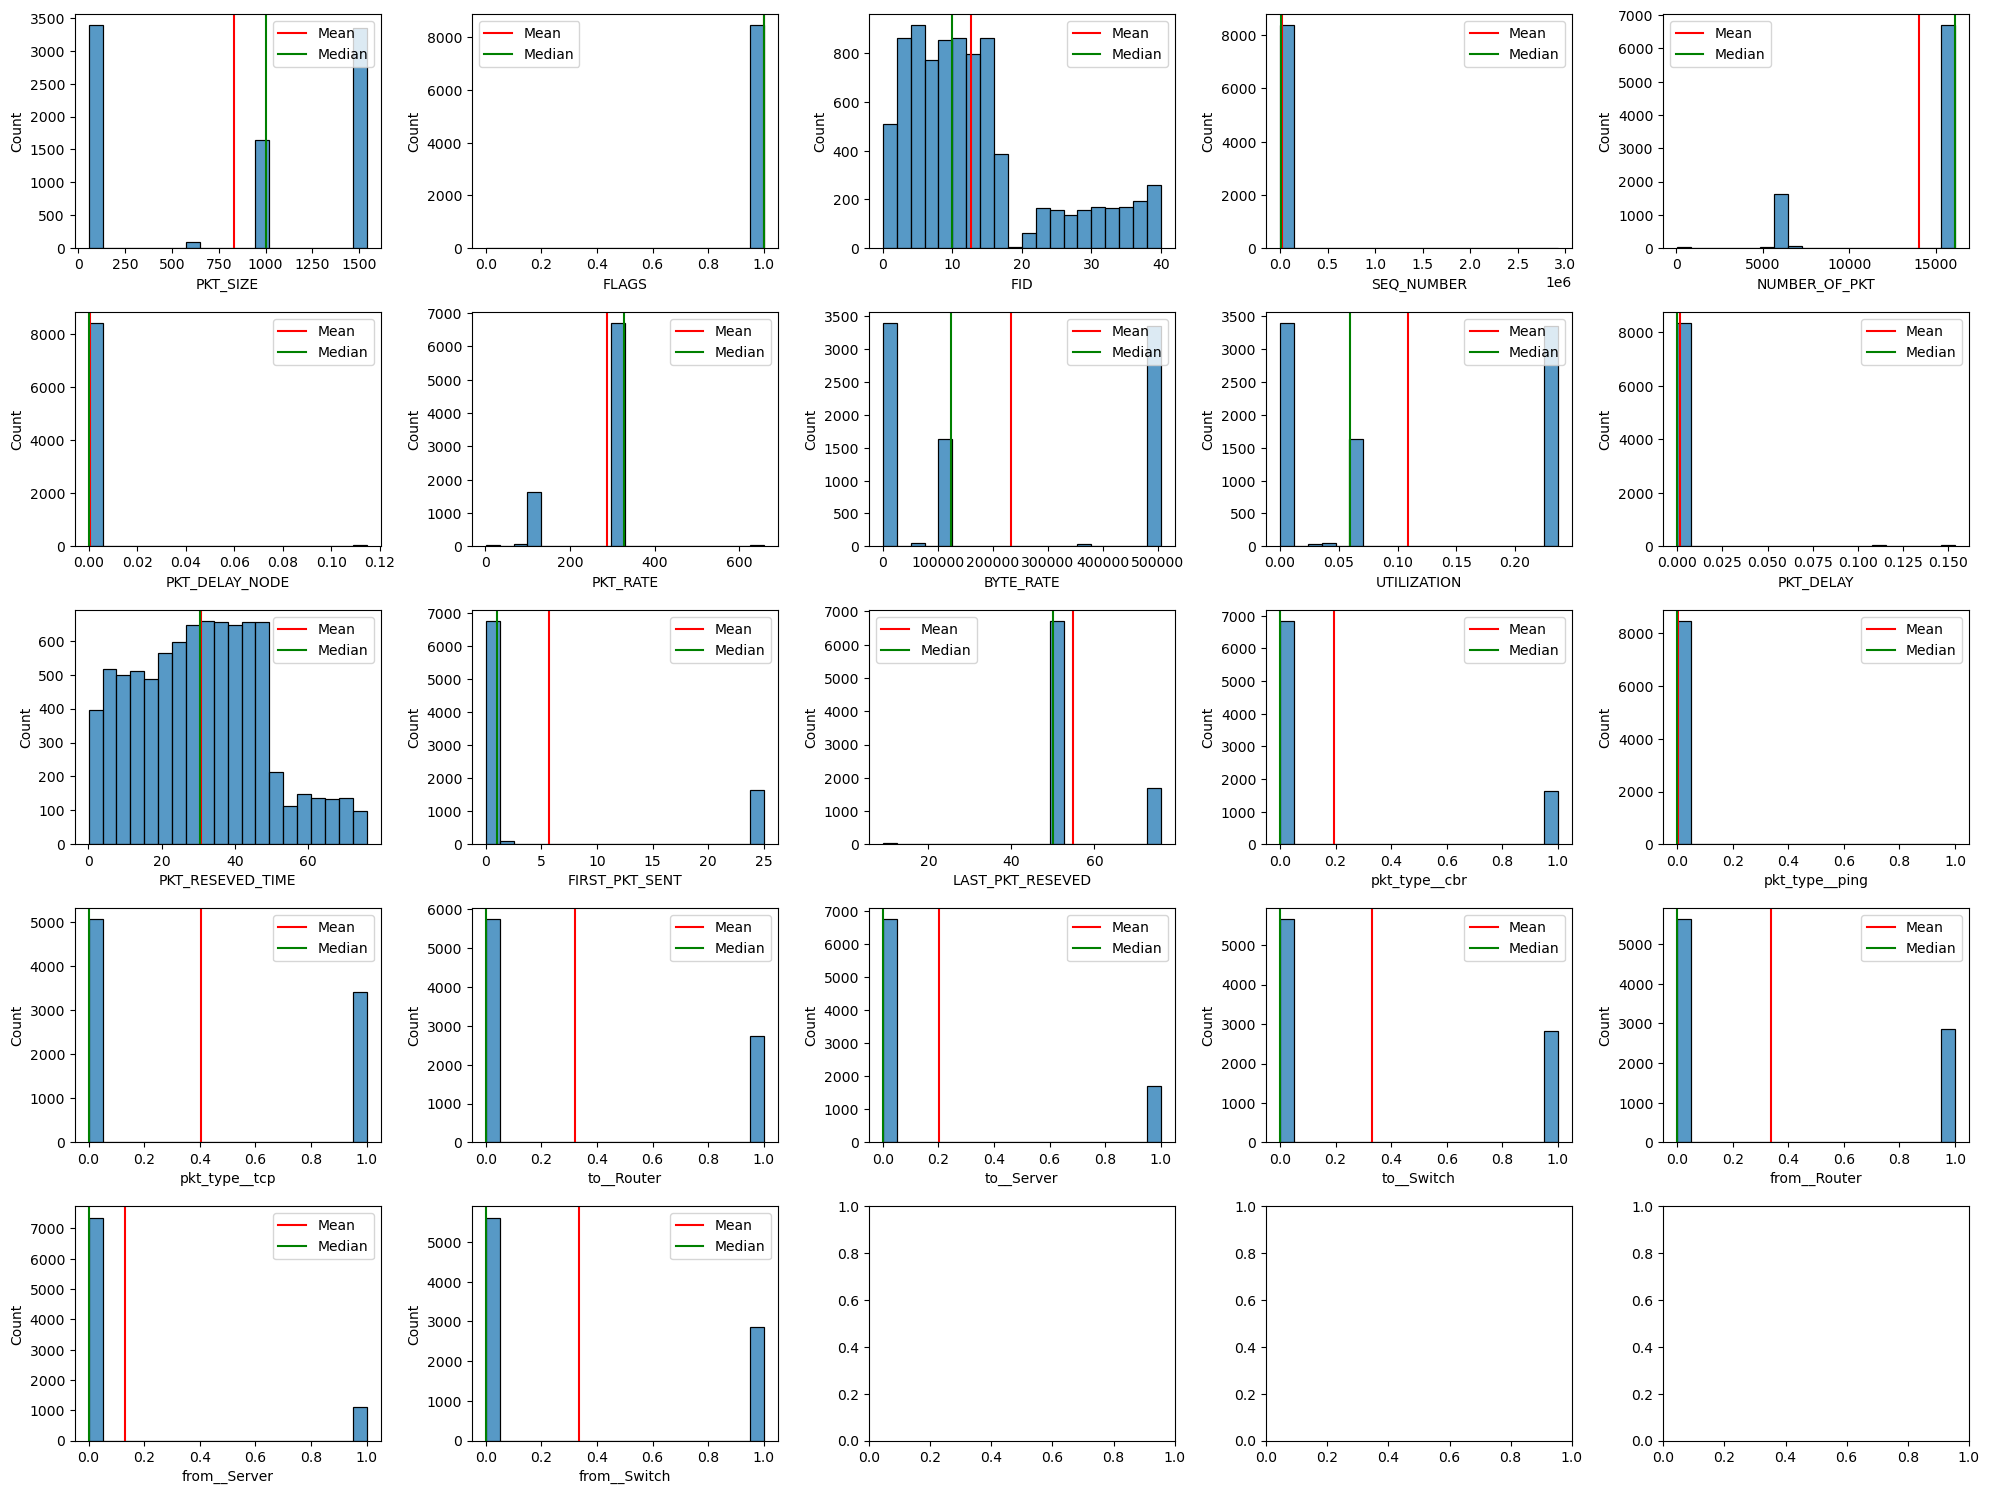

Execution time: 2.1441233158111572 seconds


In [218]:
import time

# Record the start time
start_time = time.time()
# visualize distribution of unscaled data in each feature
col_names = false_negatives.columns
plot_num = 1

plt.subplots(5,5, figsize=(20,15))

for col in col_names:
    # Save column values, mean, and median to variables
    var_mean = false_negatives[col].mean()
    var_median = false_negatives[col].median()
    
    plt.subplot(5,5,plot_num)
    sns.histplot(false_negatives[col],bins=20)
    #sns.displot(var)
    plt.axvline(var_mean, c='r', label='Mean')
    plt.axvline(var_median, c='g', label='Median')
    plt.legend()
    
    plot_num +=1
    
plt.tight_layout()
plt.show()

# Record the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

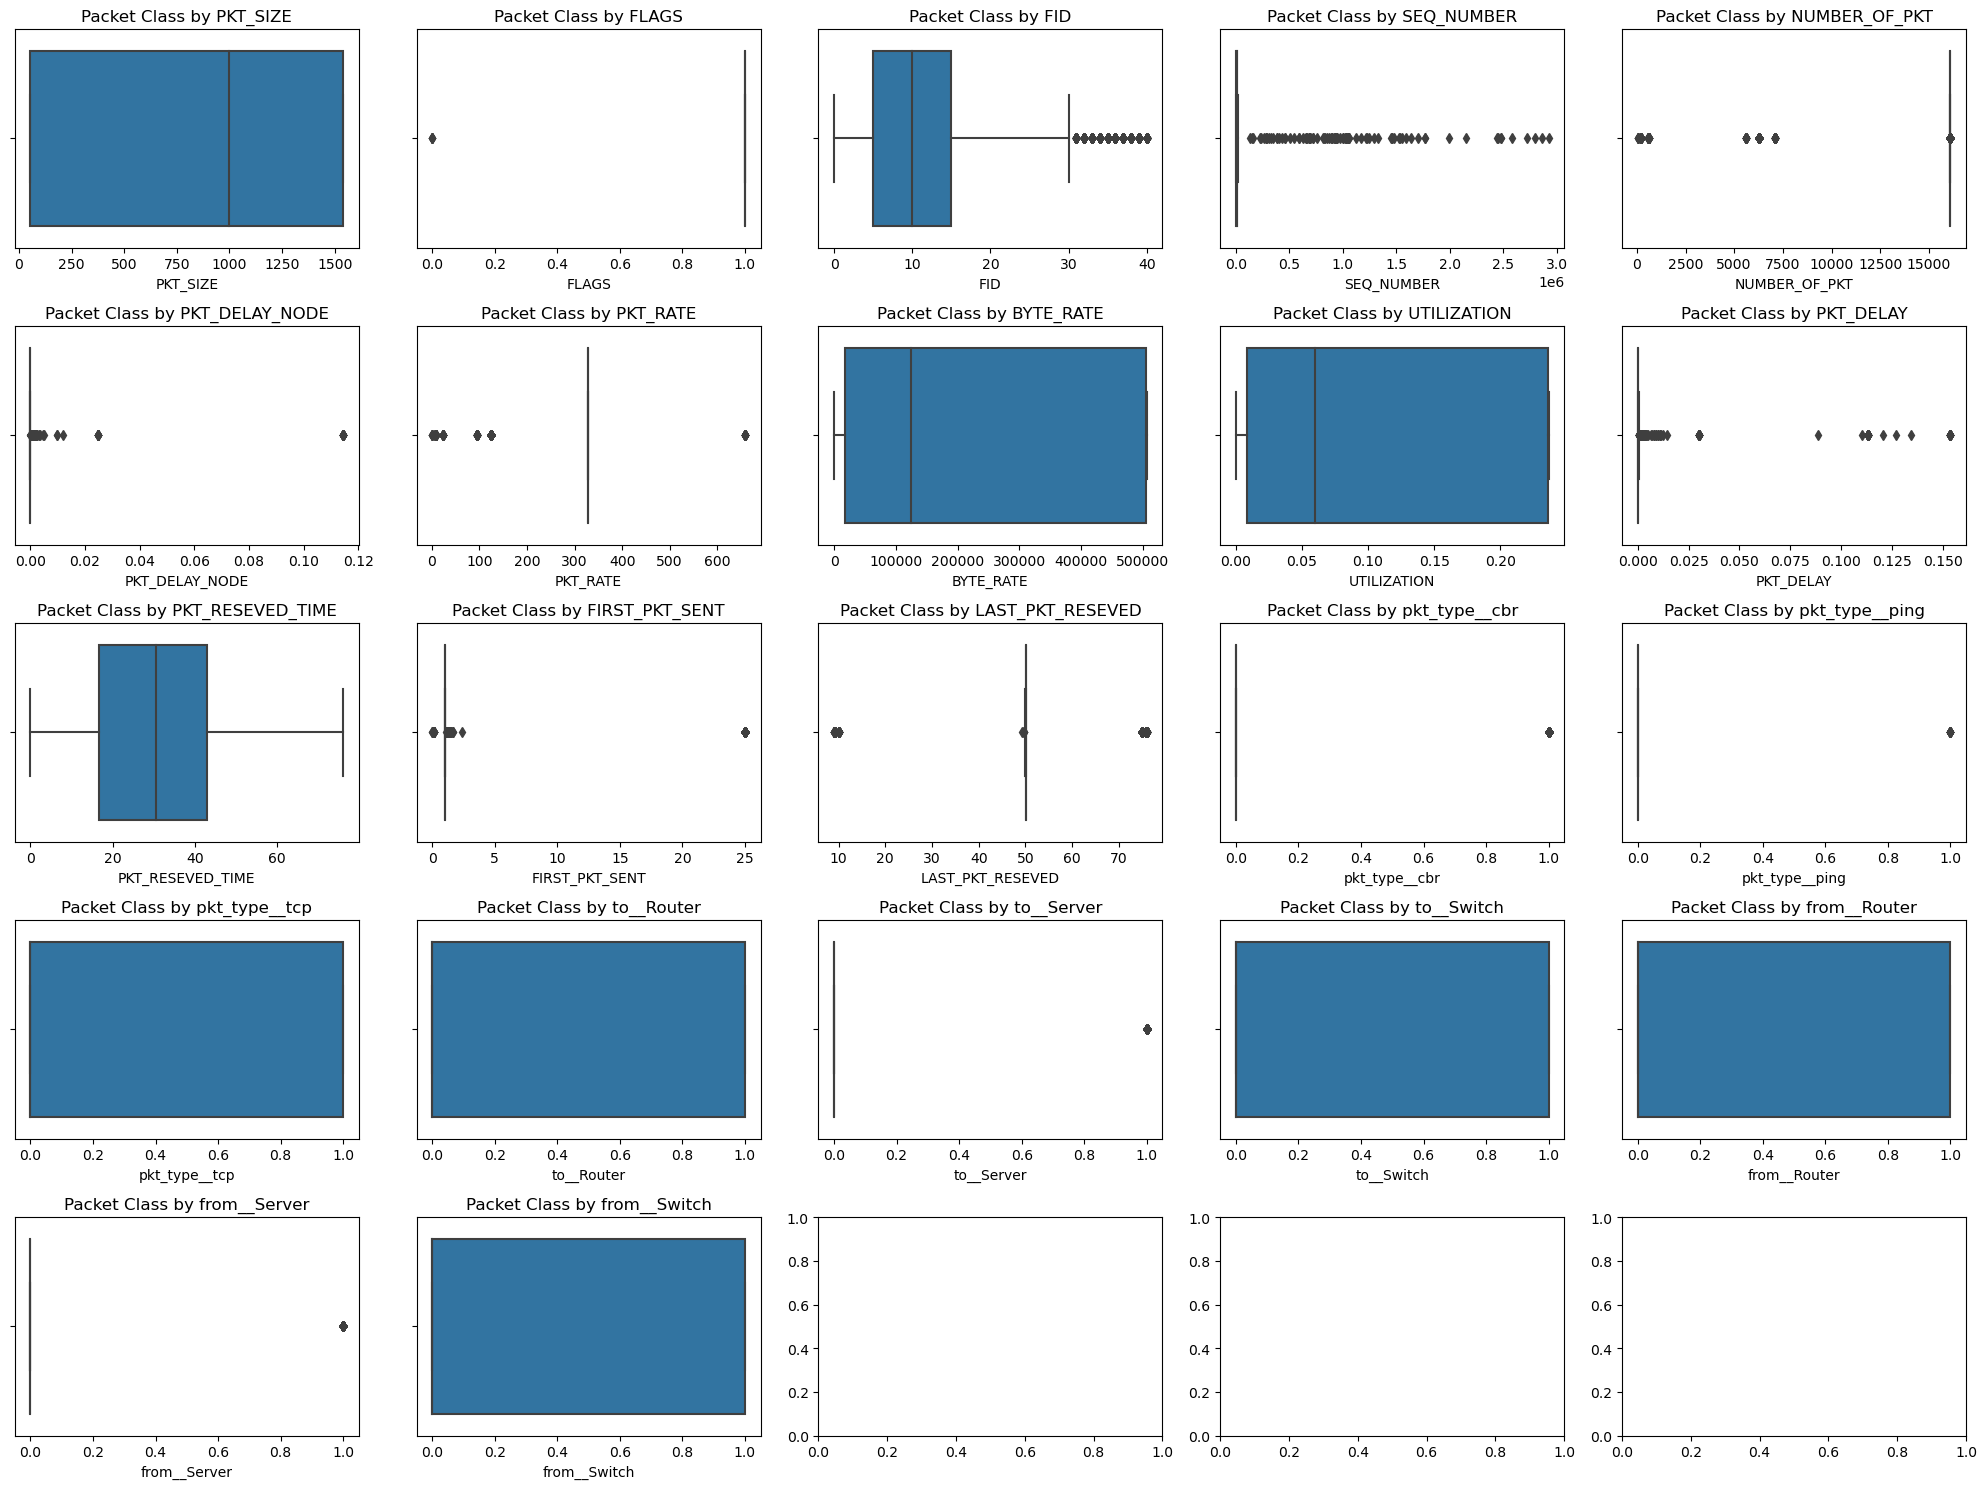

In [219]:
plot_num = 1
plt.subplots(5,5, figsize=(20,15))

for col in false_negatives:
    plt.subplot(5,5,plot_num)
    plot_num +=1
    sns.boxplot(x=col, data=false_negatives)
    plt.title(f'Packet Class by {col}')
    
plt.tight_layout()
plt.show()

We didn't get much insights about the pattern of False Negatives.

### 5.3 Hyperparameter Tuning For LogReg

In [104]:
from sklearn.model_selection import cross_val_score
import time

We don't need to do a train and validation split with the remainder of the data. Cross-validation will do that for us!

Looking for the optimal regularization (C)

In [105]:
import time
import numpy as np
import matplotlib.pyplot as plt    
    #EXPERIMENT 1: 5-fold cross validation ###

cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

start = time.time()

#Do some cross validation
for c in C_range:
        LR_model = LogisticRegression(C=c,random_state=1,n_jobs=-1)
        cv_score = np.mean(cross_val_score(LR_model, X_train_pca, y_train_resampled, cv = 5, n_jobs=-1))
        cross_validation_scores.append(cv_score)

end = time.time()

print(end-start, "seconds")

10.343988180160522 seconds


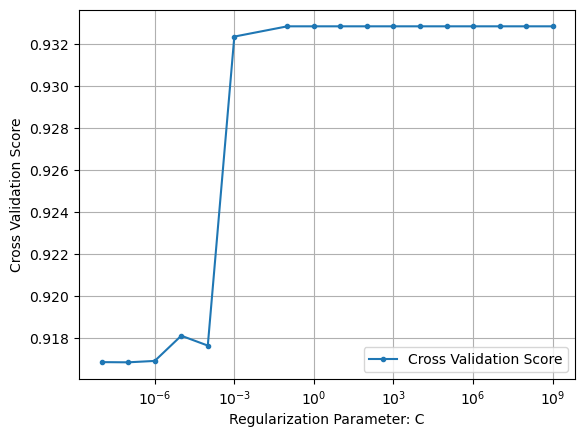

The best model has C =  0.1


In [107]:
plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

which_max = np.array(cross_validation_scores).argmax()

print("The best model has C = ",C_range[which_max])

#### Gridsearch

In [108]:
from tempfile import mkdtemp
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
# Set up a directory to cache the pipeline results - if the same step with the same parameters is called again, the cached result is used instead of re-computing it.
cachedir = mkdtemp()

# Set up a pipeline
# The steps here act as placeholders and will be changed when we pass the pipeline into the grid search later
my_pipeline = Pipeline(steps=[
                        ('scaler', StandardScaler()),
                        ('dim_reducer', PCA()),
                        ('model', LogisticRegression())],
                        memory=cachedir)

In [109]:
# Let's try the same range of C values from earlier
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000]

# Parameter grid
logreg_param_grid = [

    # l1 with PCA
    {'scaler': [StandardScaler(),None],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components': [0.95, 0.9, 0.85, 0.8],
     'model': [LogisticRegression(solver='saga',penalty='l1', random_state=1, n_jobs=-1, max_iter=100000)],
     'model__C': c_values},


    # l2 (default) with PCA
    {'scaler': [StandardScaler(), None],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components': [0.95, 0.9, 0.85, 0.8],
     'model': [LogisticRegression(penalty='l2',random_state=1, n_jobs=-1, max_iter=100000)],
     'model__C': c_values}
]

In [110]:
start = time.time()
# Instantiate the log reg grid search
logreg_gs = GridSearchCV(my_pipeline, param_grid=logreg_param_grid, cv=5, n_jobs=-1, verbose=1, scoring=['recall', 'accuracy'], refit='recall')

# Fit the log reg grid search
logreg_gs.fit(X_train_resampled, y_train_resampled)

end=time.time()
print(end-start, "seconds")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
74.26781845092773 seconds


In [111]:
# Retrieve best parameters and score
print("Best Parameters:", logreg_gs.best_params_)
print("Best Score:", logreg_gs.best_score_)

Best Parameters: {'dim_reducer': PCA(), 'dim_reducer__n_components': 0.95, 'model': LogisticRegression(max_iter=100000, n_jobs=-1, penalty='l1', random_state=1,
                   solver='saga'), 'model__C': 0.001, 'scaler': StandardScaler()}
Best Score: 0.8736840069558847


In [112]:
# Predict on the training set
y_pred_train = logreg_gs.predict(X_train_resampled)

# Calculate accuracy, recall, and other metrics
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
recall_train = recall_score(y_train_resampled, y_pred_train)
f1_train = f1_score(y_train_resampled, y_pred_train)
roc_auc_train = roc_auc_score(y_train_resampled, y_pred_train)

print("Train Accuracy:", accuracy_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)
print("Train ROC AUC Score:", roc_auc_train)

Train Accuracy: 0.9323822601973349
Train Recall: 0.8736395076797884
Train F1-score: 0.9281623169611497
Train ROC AUC Score: 0.9323822601973348


In [113]:
logreg_gs.best_estimator_

Pipeline(memory='C:\\Users\\askha\\AppData\\Local\\Temp\\tmpm_lgtv9w',
         steps=[('scaler', StandardScaler()),
                ('dim_reducer', PCA(n_components=0.95)),
                ('model',
                 LogisticRegression(C=0.001, max_iter=100000, n_jobs=-1,
                                    penalty='l1', random_state=1,
                                    solver='saga'))])

In [114]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score


In [115]:
# Get the best estimator from the grid search
best_estimator = logreg_gs.best_estimator_

# Predict on the test set
y_pred = best_estimator.predict(X_test)

# Calculate evaluation metrics
accuracy_test = accuracy_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Test Accuracy:", accuracy_test)
print("Test Recall:", recall_test)
print("Test F1:", f1)
print("Test ROC AUC:", roc_auc)

Test Accuracy: 0.9791438149586317
Test Recall: 0.874490083515049
Test F1: 0.8971336828409031
Test ROC AUC: 0.9328906129470118


In [116]:
metrics_df.loc['LogRegOpt']=[accuracy_train, accuracy_test, recall_train, recall_test]
metrics_df

,Train Accuracy,Test Accuracy,Train Recall,Test Recall
LogReg,0.932865,0.980000,0.87357,0.874416
LogRegOpt,0.932382,0.979144,0.87364,0.874490


## 6. Modelling with XGBoost

To find the best hyperparameters, we will experiement with `n_estimators`, `max_depth`, `learning_rate` and `optimezer`.
As our focus is maximization of `recall` metric, we tried to set scoring='recall', but it ended up with poor perfomrance for the `accuracy`(~10%).
So, we will be setting scoring parameter to `accuracy` and `recall` to maximize both.

#### Experimenting With Number of Estimators

In [58]:
import time
import numpy as np

start=time.time()

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

my_xgb = XGBClassifier(n_jobs=-1)

param = {'n_estimators': np.arange(1, 50, 1)}

# Define the list of scoring metrics
scoring = ['accuracy', 'recall']

grid_xgb = GridSearchCV(my_xgb, param_grid=param, verbose=1, n_jobs=-1, cv=5, scoring=scoring, refit='recall')

grid_xgb.fit(X_train_resampled, y_train_resampled)

end=time.time()
print(end-start, "seconds")

Fitting 5 folds for each of 49 candidates, totalling 245 fits
26.901118755340576 seconds


In [59]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, precision_score
# Predict on the training set
y_pred_train = grid_xgb.predict(X_train_resampled)

# Calculate accuracy, recall, and other metrics
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
recall_train = recall_score(y_train_resampled, y_pred_train)
f1_train = f1_score(y_train_resampled, y_pred_train)
roc_auc_train = roc_auc_score(y_train_resampled, y_pred_train)

print("Train Accuracy:", accuracy_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)
print("Train ROC AUC Score:", roc_auc_train)

Train Accuracy: 0.9362539416132641
Train Recall: 0.8726477469229986
Train F1-score: 0.9319238785804971
Train ROC AUC Score: 0.9362539416132643


In [60]:
grid_xgb.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_estimators', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_test_recall', 'split1_test_recall', 'split2_test_recall', 'split3_test_recall', 'split4_test_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall'])

In [65]:
# we cast max_depth to str so that seaborn treats it like a category,
# which is better for visuals
results_df = pd.DataFrame({
    "n_estimators": grid_xgb.cv_results_["param_n_estimators"],
    'mean_accuracy_score': grid_xgb.cv_results_["mean_test_accuracy"],
    'mean_recall_score': grid_xgb.cv_results_["mean_test_recall"]
})

results_df

,n_estimators,mean_accuracy_score,mean_recall_score
0,1,0.936209,0.872635
1,2,0.936216,0.872635
2,3,0.936232,0.872635
3,4,0.936229,0.872635
4,5,0.936238,0.872635
5,6,0.936232,0.872629
6,7,0.936235,0.872629
7,8,0.936238,0.872635
8,9,0.936241,0.872635
9,10,0.936241,0.872635


In [62]:
grid_xgb.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_estimators', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_test_recall', 'split1_test_recall', 'split2_test_recall', 'split3_test_recall', 'split4_test_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall'])

So, `n_estimator=1` is good enough but we will stick to 10 models to prevent overfitting.

#### Experimenting With Maximum _Depth

In [66]:
start=time.time()
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

my_xgb = XGBClassifier(n_jobs=-1)

param = {'n_estimators': [10], 'max_depth': np.arange(1, 10, 2)}

grid_xgb = GridSearchCV(my_xgb, param_grid=param, verbose=1, n_jobs=-1, cv=5, scoring=scoring, refit='recall')

grid_xgb.fit(X_train_resampled, y_train_resampled)

end=time.time()
print(end-start, "seconds")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
3.9582161903381348 seconds


In [67]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
# Predict on the training set
y_pred_train = grid_xgb.predict(X_train_resampled)

# Calculate accuracy, recall, and other metrics
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
recall_train = recall_score(y_train_resampled, y_pred_train)
f1_train = f1_score(y_train_resampled, y_pred_train)
roc_auc_train = roc_auc_score(y_train_resampled, y_pred_train)

print("Train Accuracy:", accuracy_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)
print("Train ROC AUC Score:", roc_auc_train)

Train Accuracy: 0.9290477825246669
Train Recall: 0.8745740514698404
Train F1-score: 0.9249600779949909
Train ROC AUC Score: 0.9290477825246669


In [68]:
# we cast max_depth to str so that seaborn treats it like a category,
# which is better for visuals
results_df = pd.DataFrame({
    "max_depth": grid_xgb.cv_results_["param_max_depth"],
    'mean_accuracy_score': grid_xgb.cv_results_["mean_test_accuracy"],
    'mean_recall_score': grid_xgb.cv_results_["mean_test_recall"]
})

results_df.head()

,max_depth,mean_accuracy_score,mean_recall_score
0,1,0.929048,0.874574
1,3,0.936238,0.872635
2,5,0.936241,0.872635
3,7,0.936241,0.872635
4,9,0.936216,0.872635


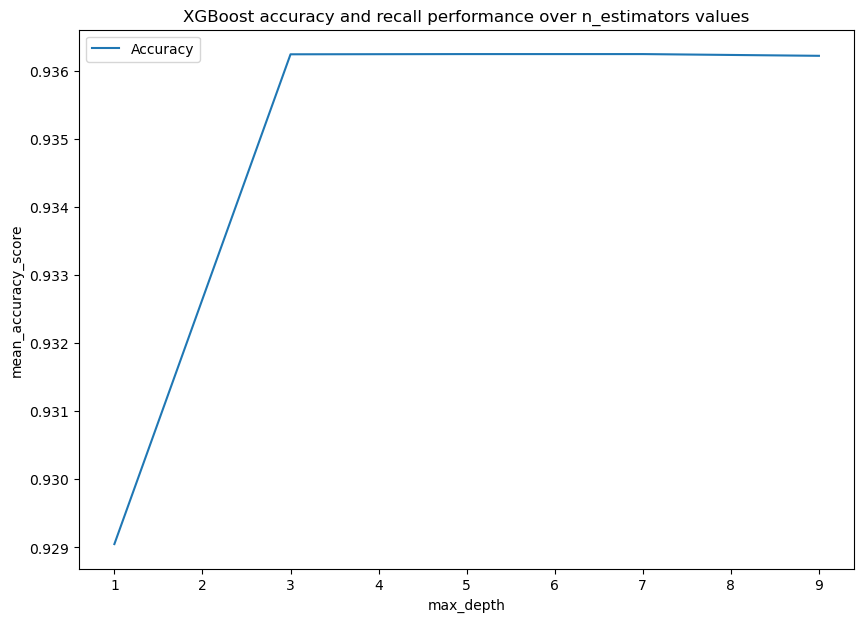

In [69]:
plt.figure(figsize=(10, 7))

# Plot the first line for mean_accuracy_score
sns.lineplot(x="max_depth", y="mean_accuracy_score", data=results_df, label="Accuracy")

plt.title("XGBoost accuracy and recall performance over n_estimators values")

plt.show()

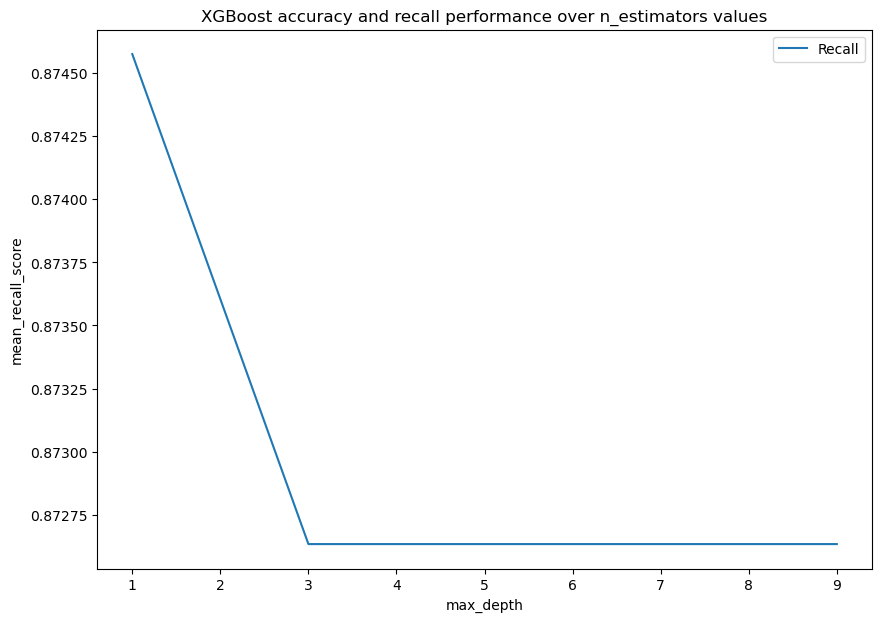

In [71]:
plt.figure(figsize=(10, 7))

# Plot the second line for mean_recall_score
sns.lineplot(x="max_depth", y="mean_recall_score", data=results_df, label="Recall")

plt.title("XGBoost accuracy and recall performance over n_estimators values")

plt.show()

So, the best `max_depth parameter is 3`. Further increase of depth wouldn't provide much improvement in model accuracy and recall.

#### Experimenting With Learning Rate

In [73]:
start=time.time()
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

my_xgb = XGBClassifier(n_jobs=-1)

param = {'n_estimators': [10], 'max_depth': [3], 'learning_rate': np.arange(0.1, 1, 0.05)}

grid_xgb = GridSearchCV(my_xgb, param_grid=param, verbose=1, n_jobs=-1, cv=5, scoring=scoring, refit='recall')

grid_xgb.fit(X_train_resampled, y_train_resampled)

end=time.time()
print(end-start, "seconds")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
6.646679401397705 seconds


In [74]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
# Predict on the training set
y_pred_train = grid_xgb.predict(X_train_resampled)

# Calculate accuracy, recall, and other metrics
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
recall_train = recall_score(y_train_resampled, y_pred_train)
f1_train = f1_score(y_train_resampled, y_pred_train)
roc_auc_train = roc_auc_score(y_train_resampled, y_pred_train)

print("Train Accuracy:", accuracy_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)
print("Train ROC AUC Score:", roc_auc_train)

Train Accuracy: 0.9362380480113925
Train Recall: 0.8726350320415014
Train F1-score: 0.9319071365285844
Train ROC AUC Score: 0.9362380480113925


In [75]:
grid_xgb.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_test_recall', 'split1_test_recall', 'split2_test_recall', 'split3_test_recall', 'split4_test_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall'])

In [76]:
# we cast max_depth to str so that seaborn treats it like a category,
# which is better for visuals
results_df = pd.DataFrame({
    "max_depth": grid_xgb.cv_results_["param_max_depth"],
    'mean_accuracy_score': grid_xgb.cv_results_["mean_test_accuracy"],
    'mean_recall_score': grid_xgb.cv_results_["mean_test_recall"],
    'param_learning_rate': grid_xgb.cv_results_["param_learning_rate"]
})

results_df

,max_depth,mean_accuracy_score,mean_recall_score,param_learning_rate
0,3,0.936238,0.872635,0.1
1,3,0.936238,0.872635,0.15
2,3,0.936238,0.872635,0.2
3,3,0.936238,0.872635,0.25
4,3,0.936238,0.872635,0.3
5,3,0.936238,0.872635,0.35
6,3,0.936235,0.872635,0.4
7,3,0.936238,0.872635,0.45
8,3,0.936235,0.872635,0.5
9,3,0.936235,0.872635,0.55


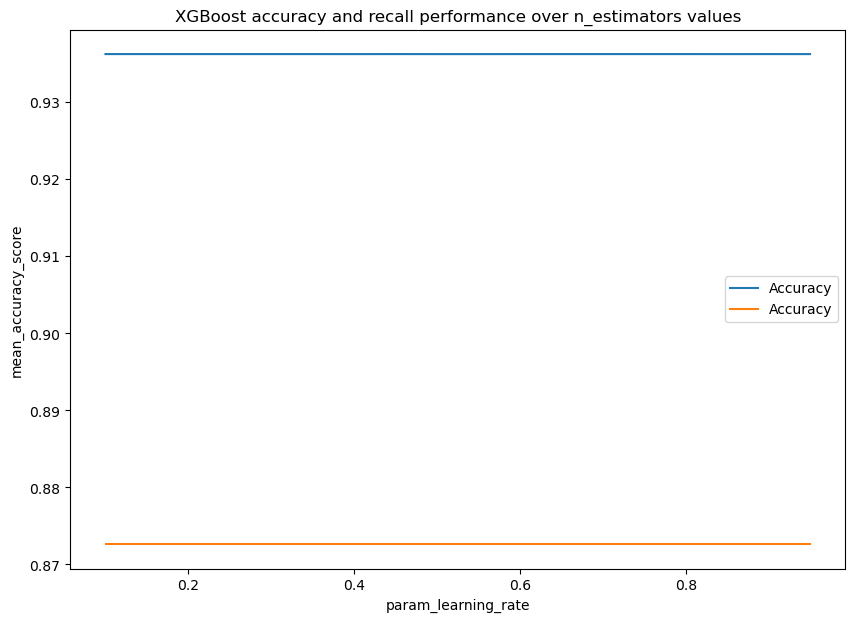

In [77]:
plt.figure(figsize=(10, 7))

# Plot the first line for mean_accuracy_score
sns.lineplot(x="param_learning_rate", y="mean_accuracy_score", data=results_df, label="Accuracy")

sns.lineplot(x="param_learning_rate", y="mean_recall_score", data=results_df, label="Accuracy")

plt.title("XGBoost accuracy and recall performance over n_estimators values")

plt.show()

Learning rate parameter wouldn't help us to improve the model performance.

#### Experimenting With Objective Function

In [80]:
start=time.time()
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

my_xgb = XGBClassifier(n_jobs=-1)

param ={'X_train_resampledtors': [10], 'max_depth': [3], 'objective': ['binary:logistic', 'binary:logitraw']}

grid_xgb = GridSearchCV(my_xgb, param_grid=param, verbose=1, n_jobs=-1, cv=5, scoring=scoring, refit='recall')

grid_xgb.fit(X_train_resampled, y_train_resampled)

end=time.time()
print(end-start, "seconds")

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\askha\anaconda3\envs\deeplearning\lib\site-packages\xgboost\core.py:160: UserWarning: [02:41:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "X_train_resampledtors" } are not used.

  warnings.warn(smsg, UserWarning)


3.3417208194732666 seconds


In [81]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
# Predict on the training set
y_pred_train = grid_xgb.predict(X_train_resampled)

# Calculate accuracy, recall, and other metrics
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
recall_train = recall_score(y_train_resampled, y_pred_train)
f1_train = f1_score(y_train_resampled, y_pred_train)
roc_auc_train = roc_auc_score(y_train_resampled, y_pred_train)

print("Train Accuracy:", accuracy_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)
print("Train ROC AUC Score:", roc_auc_train)

Train Accuracy: 0.9362539416132641
Train Recall: 0.8726477469229986
Train F1-score: 0.9319238785804971
Train ROC AUC Score: 0.9362539416132643


In [83]:
# we cast max_depth to str so that seaborn treats it like a category,
# which is better for visuals
results_df = pd.DataFrame({
    "max_depth": grid_xgb.cv_results_["param_max_depth"],
    'mean_accuracy_score': grid_xgb.cv_results_["mean_test_accuracy"],
    'mean_recall_score': grid_xgb.cv_results_["mean_test_recall"],
    'param_objective': grid_xgb.cv_results_["param_objective"]
})

results_df.head(5)

,max_depth,mean_accuracy_score,mean_recall_score,param_objective
0,3,0.936238,0.872635,binary:logistic
1,3,0.936241,0.872635,binary:logitraw


So, both objective functions showed same performance. We will stick to the default one - `binary:logistic`

#### Testing With The Best Hyperparameters

In [121]:
start=time.time()
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

my_xgb = XGBClassifier(n_jobs=-1)

param = {'n_estimators': [10], 'max_depth': [3]}

grid_xgb = GridSearchCV(my_xgb, param_grid=param, verbose=1, n_jobs=-1, cv=5, scoring=scoring, refit='recall')

grid_xgb.fit(X_train_resampled, y_train_resampled)

end=time.time()
print(end-start, "seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
1.072035551071167 seconds


In [122]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
# Predict on the training set
y_pred_train = grid_xgb.predict(X_train_resampled)

# Calculate accuracy, recall, and other metrics
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
recall_train = recall_score(y_train_resampled, y_pred_train)
f1_train = f1_score(y_train_resampled, y_pred_train)
roc_auc_train = roc_auc_score(y_train_resampled, y_pred_train)

print("Train Accuracy:", accuracy_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_train)
print("Train ROC AUC Score:", roc_auc_train)

Train Accuracy: 0.9362380480113925
Train Recall: 0.8726350320415014
Train F1-score: 0.9319071365285844
Train ROC AUC Score: 0.9362380480113925


In [123]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
# Predict on the training set
y_pred_test = grid_xgb.predict(X_test)

# Calculate accuracy, recall, and other metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)

print("Test Accuracy:", accuracy_test)
print("Test Recall:", recall_test)
print("Test F1-score:", f1_test)
print("Test ROC AUC Score:", roc_auc_test)

Test Accuracy: 0.9867309677090902
Test Recall: 0.8735407117321585
Test F1-score: 0.9319417299033843
Test ROC AUC Score: 0.9367049275170086


In [124]:
metrics_df.loc['XGBoostOpt'] = [accuracy_train, accuracy_test, recall_train, recall_test]
metrics_df

,Train Accuracy,Test Accuracy,Train Recall,Test Recall
LogReg,0.932865,0.980000,0.873570,0.874416
LogRegOpt,0.932382,0.979144,0.873640,0.874490
XGBoostOpt,0.936238,0.986731,0.872635,0.873541


The table shows performance of 3 models: `LogReg`, `LogRegOpt` - with hyperparameter tuning and `XGBoostOpt` - hyperparameter tunning applied.

## 7. Dense Neural Network

Please refert to /deeplearning/Dense_Network.ipynb file

## 8. Comparison of Logistic Regression, XGBoost and DenseNetwork Performance

We will collect the model evaluation metrics from SMOTE and DenseNetwork notebooks to combine.

In [178]:

# Define the path to the CSV file
path_1 = "C:/Users/askha/OneDrive/Desktop/BrainStation/Capstone/DDos_attack_detection/notebooks/csv/Smote.csv"
path_2 = "C:/Users/askha/OneDrive/Desktop/BrainStation/Capstone/DDos_attack_detection/notebooks/csv/Dense_Network.csv"

# Read the CSV file into a DataFrame
smote_df = pd.read_csv(path_1, index_col=False)

network_df = pd.read_csv(path_2, index_col=False)

In [183]:
# Set the index of the DataFrame to a specific column
smote_df.set_index('Unnamed: 0', inplace=True)
network_df.set_index('Unnamed: 0', inplace=True)

In [186]:
# Concatenate the DataFrames along rows (stack vertically)
combined_df = pd.concat([metrics_df, smote_df, network_df], axis=0)
combined_df

,Train Accuracy,Test Accuracy,Train Recall,Test Recall
LogReg,0.932865,0.980000,0.873570,0.874416
LogRegOpt,0.932382,0.979144,0.873640,0.874490
XGBoostOpt,0.936238,0.986731,0.872635,0.873541
LogReg_SMOTE,0.973243,0.973243,0.946838,0.873570
LogRegOpt_SMOTE,0.927627,0.970716,0.873502,0.874490
XGBoostOpt_SMOTE,0.985097,0.986712,0.970357,0.873541
Dense_Network,0.935867,0.985993,0.872513,0.874638


In [191]:
# Create DataFrame
data = {
    'Algorithm': ['LogReg', 'LogRegOpt', 'XGBoostOpt', 'LogReg_SMOTE', 'LogRegOpt_SMOTE', 'XGBoostOpt_SMOTE', 'Dense_Network'],
    'Train Accuracy': [0.932865, 0.932382, 0.936238, 0.973243, 0.927627, 0.985097, 0.935867],
    'Test Accuracy': [0.98, 0.979144, 0.986731, 0.973243, 0.970716, 0.986712, 0.985993],
    'Train Recall': [0.873570, 0.873640, 0.872635, 0.946838, 0.873502, 0.970357, 0.872513],
    'Test Recall': [0.874416, 0.874490, 0.873541, 0.873570, 0.874490, 0.873541, 0.874638]
}

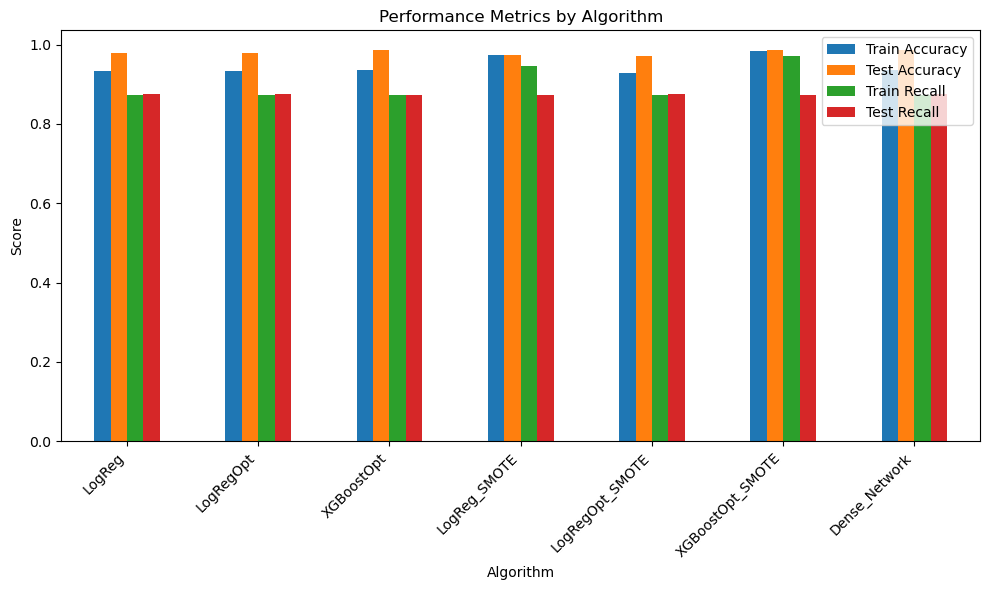

In [195]:
df = pd.DataFrame(data)
df.set_index('Algorithm', inplace=True)

# Plotting
df.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics by Algorithm')
plt.ylabel('Score')
plt.xlabel('Algorithm')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* XGBoostOpt_SMOTE (i.e hypertuned XGBoost with SMOTE balancing) showed highest training accuracy - 97.5%
* Dense Network, XGBoostOpt_SMOTE and XGBoostOpt (hypertuned XGBoost with undersampling) showed highest Test Accuracy - 98.6%
* XGBoostOpt_SMOTE showed highest Train Recall - 97.03%
* Test Recall relatively the same across all algorithms - 87.35-87.46

In summary, the XGBoostOpt_SMOTE model stands out for its high training accuracy and recall, 
while the Dense Network, XGBoostOpt_SMOTE, and XGBoost Opt models performed exceptionally well in terms of test accuracy. 
Despite slight variations, the test recall remained consistent across all algorithms, indicating their stability in identifying 
positive instances in the test data.






